## Notebook by SamuelWall on GitHub
### for Research at the Grove School of Engineering Computer Science Department
### Mentors: Professor Michael Grossberg
### ***Contributions by Samuel Wolnerman, Michael Grossberg, and Nicholas Steiner***

## Image Format Conversions

In [ ]:
!git clone https://github.com/ialhashim/DenseDepth.git
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O /content/drive/MyDrive/Colab\ Notebooks/DenseDepth/nyu.h5

In [ ]:
# CONVERT PNG DEPTHS TO NPY
for i in range(1,82):
  inp = str(i).zfill(4)
  im = io.imread(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG/Image{}.png').format(inp))
  np.save('/content/drive/MyDrive/Lidar Trees/Block Depth/NPY/Image{}.npy'.format(i), im)

In [ ]:
# CONVERT EXR DEPTHS TO NPY
for i in range(1,351):
  inp = str(i).zfill(4)
  im = cv2.imread(str('/content/drive/MyDrive/Lidar Trees/Block Depth/EXR/Image{}.exr').format(inp),  cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
  # image = cv2.resize(im, dsize=(640,480))
  np.save('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy'.format(i), im)

In [ ]:
# CONVERT EXR DEPTHS TO NPY
for i in range(1,350):
  inp = str(i).zfill(4)
  im = cv2.imread(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/Image{}.exr').format(inp),  cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
  image = cv2.resize(im, dsize=(640,480))
  np.save('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy'.format(i), image)
# im = cv2.imread('/content/drive/MyDrive/Lidar Trees/Depth Pass/Image0001.exr',  cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
# im = im.resize((640,480))
# np.save('/content/drive/MyDrive/Lidar Trees/Depth Pass/tester.npy', im)
# plt.imshow(np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/tester.npy'))


In [ ]:
# CONVERT MP4 VIDEO TO NPY FRAMES
vidcap = cv2.VideoCapture('/content/drive/MyDrive/Lidar Trees/Block Depth/block_vid.mp4')
success,image = vidcap.read()
count = 0
while success:
  np.save("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame%d.npy" % count, image)     # save frame as NPY file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

In [ ]:
# CONVERT MP4 VIDEO TO JPEG FRAMES
vidcap = cv2.VideoCapture('/content/drive/MyDrive/Lidar Trees/Color Trunks/color_forest_mp4.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/drive/MyDrive/Lidar Trees/Color Trunks/JPEG FRAMES/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

In [ ]:
# CONVERT JPG TO PNG
for i in range(0,350):
    im = Image.open("/content/drive/MyDrive/Lidar Trees/Renders/JPEG Frames/frame{}.jpg".format(i))
    im = im.resize((640,480))
    im.save(r'/content/drive/MyDrive/Lidar Trees/Renders/PNG Frames/frame{}.png'.format(i))

In [ ]:
# CONVERT PNG to NPY
for i in range(1,350):
  im = io.imread(str('/content/drive/MyDrive/Lidar Trees/Renders/PNG Frames/frame{}.png').format(i))
  np.save('/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy'.format(i), im)

In [ ]:
# CONVERT JPG TO PNG
for i in range(0,350):
    im = Image.open("/content/drive/MyDrive/Lidar Trees/Color Trunks/JPEG FRAMES/frame{}.jpg".format(i))
    im = im.resize((640,480))
    im.save(r'/content/drive/MyDrive/Lidar Trees/Color Trunks/PNG FRAMES/frame{}.png'.format(i))

In [ ]:
# CONVERT JPG TO PNG
for i in range(0,350):
    im = Image.open("/content/drive/MyDrive/Lidar Trees/Renders/JPEG Frames/frame{}.jpg".format(i))
    im = im.resize((640,480))
    im.save(r'/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame{}.png'.format(i))

In [ ]:
!cd '/content/drive/MyDrive/Colab Notebooks/DenseDepth/'; python test.py

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow( np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth80.npy'))

In [ ]:
# CREATE OUTPUT ARRAY OF FRAMES
%matplotlib inline 
image = np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/output0.npy')
output = []
for i in range(0,349):
  ar = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/output{}.npy'.format(i)))
  output.append(ar[:,:,0])
# plt.imshow(output[57])


In [ ]:
# CREATE ANIMATION FROM ARRAY OF FRAMES
def animate(i, ax, frames):
  """ From here: https://www.geeksforgeeks.org/matplotlib-animation-funcanimation-class-in-python/
  """
  #print(ax)
  #print(type(ax))
  ax.set_data(output[i])
  return ax,

fig, axim = plt.subplots()
dispim = axim.imshow(output[0],)
# cmap='gray'
ani = animation.FuncAnimation(fig, animate, interval=50, blit=True, fargs=[dispim, output], frames=len(output),
                                repeat_delay=1000)
anim = HTML(ani.to_jshtml())

# ani.save('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/depth_from_kitti_color.mp4', writer='ffmpeg')
# ani.save('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/depth_from_kitti_try.mp4')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


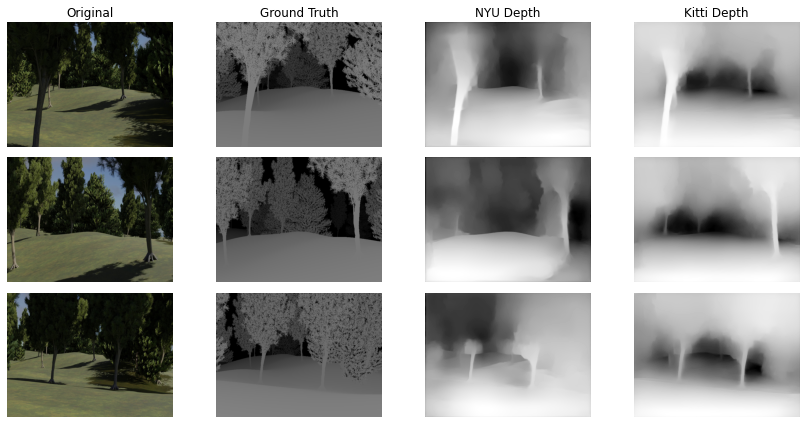

In [ ]:
# DISPLAY COMPARITIVE IMAGES IN PLOT AND SAVE
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth1.npy')
nyu_depth = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/outputs/output0.npy')[:,:,0])
kitti_depth = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/output0.npy')[:,:,0])
ground_truth1 = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth30.npy')
nyu_depth1 = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/outputs/output30.npy')[:,:,0])
kitti_depth1 = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/output30.npy')[:,:,0])
ground_truth2 = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth320.npy')
nyu_depth2 = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/outputs/output320.npy')[:,:,0])
kitti_depth2 = (np.load('/content/drive/MyDrive/Colab Notebooks/DenseDepth/kitti_outputs/output320.npy')[:,:,0])
fig = plt.figure(figsize=(12,6))
# f, ax = plt.subplots(1,3)
gs = GridSpec(3,4)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[1,3])
ax8 = fig.add_subplot(gs[2,0])
ax9 = fig.add_subplot(gs[2,1])
ax10 = fig.add_subplot(gs[2,2])
ax11 = fig.add_subplot(gs[2,3])

ax0.imshow(io.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame0.png'))
ax4.imshow(io.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame30.png'))
ax8.imshow(io.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame320.png'))
ax0.set_title("Original")
ax1.set_title("Ground Truth")
ax2.set_title("NYU Depth")
ax3.set_title("Kitti Depth")
ax1.imshow(ground_truth, cmap='viridis')
ax2.imshow(nyu_depth, cmap='gray_r')
ax3.imshow(kitti_depth, cmap='gray_r')
ax5.imshow(ground_truth1, cmap='gray_r')
ax6.imshow(nyu_depth1, cmap='gray_r')
ax7.imshow(kitti_depth1, cmap='gray_r')
ax9.imshow(ground_truth2, cmap='gray_r')
ax10.imshow(nyu_depth2, cmap='gray_r')
ax11.imshow(kitti_depth2, cmap='gray_r')



for a in (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11):
    a.axis('off')
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/DenseDepth/output_demo_gt.png', dpi=fig.dpi)


In [ ]:
# CALCULATE AND DISPLAY Z SCORE IMAGE
ground_shaped = ground_truth[:,:,0]
ground_shaped = cv2.resize(ground_shaped, dsize=(320,240))

z_ground_score = scipy.stats.zscore(ground_shaped)
z_depth_score = scipy.stats.zscore(kitti_depth)
total_z = np.subtract(z_ground_score, z_depth_score)
total_z_abs = np.abs(np.subtract(z_ground_score, z_depth_score))

# diff = np.subtract(np.log(ground_shaped),np.log(kitti_depth))
# diff2 = np.log(np.subtract(ground_shaped, kitti_depth))


fig = plt.figure(figsize=(10,20))
gs = GridSpec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax0.imshow(total_z)
ax1.imshow(total_z_abs)

for a in (ax0, ax1):
    a.axis('off')
plt.tight_layout()
# diff = diff.flatten()


## Hough Lines

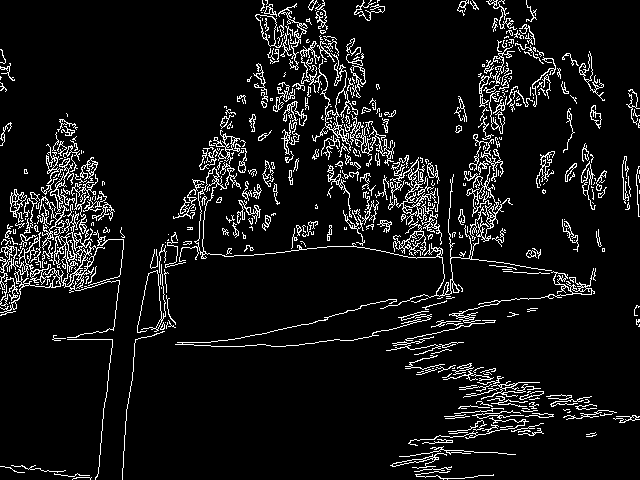

In [ ]:
# Get Hough Lines Probabilistic of Tree Image
src = cv.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame0.png')
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')



dst = cv.Canny(src, 50, 200, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 2, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 100, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)

# cv2_imshow(src)
# cv2_imshow(cdst)
cv2_imshow(dst)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in int_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in int_scalars


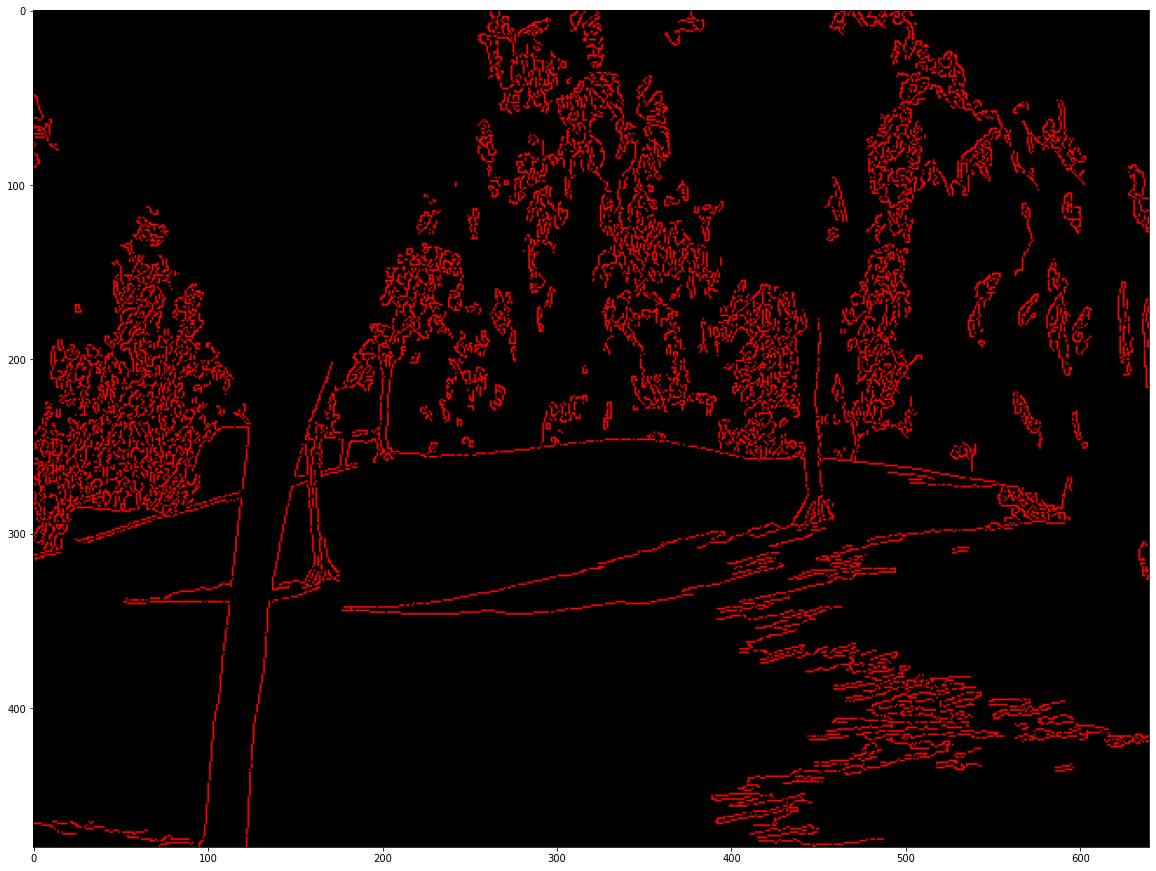

In [ ]:
# GET HOUGH TRANFORMATION OF IMAGE


src = cv.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame0.png', cv.IMREAD_GRAYSCALE)
dst = np.zeros((np.size(src,0),np.size(src, 1)), np.uint8)

color = (255,0,0)

canny = cv.Canny(src, 50, 200, 3)
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR, 0)
cdstP = np.copy(cdst)

# image = canny
# lines = 1
# rho = 2
# theta = (np.pi/180)
# threshold = 40
# minLineLength = 2
# maxLineGap = 1

# image = canny
# lines = 1
# rho = 40
# theta = (5*np.pi/180)
# threshold = 40
# minLineLength = 10
# maxLineGap = 20

image = canny
lines = 1
rho = 1
theta = (np.pi/180)
threshold = 2
minLineLength = 0
maxLineGap = 0



hough_lines = cv.HoughLinesP(	image, rho, theta, threshold, lines, minLineLength, maxLineGap)

if hough_lines is not None:
    for i in range(0, len(hough_lines)):
        l = hough_lines[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), color)
fig = plt.figure(figsize=(20,20))
plt.imshow(cdstP)

# GET SLOPES OF LINES
slopes = []
for i in range(0, len(hough_lines)):
        l = hough_lines[i][0]
        # if ((l[0] == l[2]) & (l[1] == l[3])):
        #   continue
        x_arr = (l[0],l[2])
        y_arr = (l[1],l[3])
        slopes.append((l[3] - l[1]) / (l[2] - l[0]))
        # slopes.append(np.arctan2(y_arr, x_arr) * 180 / np.pi)

# plt.imshow(canny)



In [ ]:
# lines = [];
# hough_lines_standard = cv.HoughLines(image,lines, rho, theta, threshold)
# for i in range(0, len(hough_lines_standard)):
#         l = hough_lines_standard[i][0]
#         # if ((l[0] == l[2]) & (l[1] == l[3])):
#         #   continue
#         x_arr = (l[0],l[2])
#         y_arr = (l[1],l[3])
#         slopes.append((l[3] - l[1]) / (l[2] - l[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in int_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in int_scalars
  """


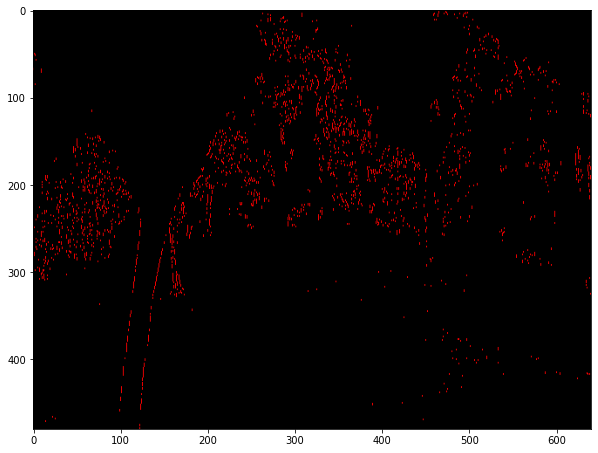

In [ ]:
# CREATE NEW LINE SET THAT IS MORE VERTICAL *
new_hough = []
for i in range(0, len(hough_lines)):
        l = hough_lines[i][0]
        if (np.abs((l[3] - l[1]) / (l[2] - l[0])) > 3.5):
          # print(l)
          new_hough.append(l)
          # np.append(new_hough, l)

# DISPLAY NEW LINE SET
dst = np.zeros((np.size(src,0),np.size(src, 1)), np.uint8)
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR, 0)
cdstP = np.copy(cdst)
if hough_lines is not None:
    for i in range(0, len(new_hough)):
        l = new_hough[i]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), color)
fig = plt.figure(figsize=(10,10))
plt.imshow(cdstP)


In [ ]:
def window_check(point, im, gt):
  x = point[0]
  y = point[1]

  window = ((im[x-1][y-1], im[x][y-1], im[x+1][y-1]),
            (im[x-1][y],   im[x][y],   im[x+1][y]),
            (im[x-1][y+1], im[x][y+1], im[x+1][y+1]))
  
  gt_window = ((gt[x-1][y-1], gt[x][y-1], gt[x+1][y-1]),
              (gt[x-1][y],   gt[x][y],   gt[x+1][y]),
              (gt[x-1][y+1], gt[x][y+1], gt[x+1][y+1]))
  
  l = window[:][0]
  r = window[:][2]

  gt_l = gt_window[:][0]
  gt_r = gt_window[:][2]

  M_l = np.mean(l)
  M_r = np.mean(r)
  M_diff = np.abs(M_l - M_r)

  sig_l = np.std(l)
  sig_r = np.std(r)

  gt_sig_l = np.std(gt_l)
  gt_sig_r = np.std(gt_r)

  if (M_diff <= min(sig_l, sig_r)):
    return 1
  else:
    return 0

In [ ]:
# CREATE LIST OF TUPLES CONTAINING THE PIXELS OF ALL HOUGH LINES
all_lines = []
for j in range(0, len(hough_lines)):
  l = hough_lines[j][0]
  slope = (l[3] - l[1]) / (l[2] - l[0])
  points = []
  b = l[1] - (slope * l[0])
  for i in range(l[0],l[2]):
    y = (slope*i) + b
    point = (i, round(y))
    points.append(point)
  # print(points)
  all_lines.append(points)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in int_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in int_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


NameError: ignored

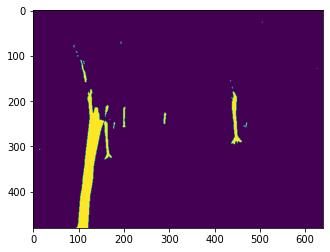

In [ ]:
# CHECK IF PIXELS ARE WITHIN TRUNKS (MAKE GT FOR BINARY CLASSIFICATION)
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame0.npy')
gt = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth1.npy')
padded_im = np.pad(im, 1)
padded_gt = np.pad(gt, 1)
# im = np.fliplr(np.rot90(im, 3))
plt.imshow(im)
threshold = .7

gt_trunk_classifications = []
for j in range(0, len(all_lines)):
  count = 0
  for i in range(0, len(all_lines[j])):
    line = all_lines[j][i]
    count += np.count_nonzero(window_check((line[1] + 1, line[0] + 1), padded_im, padded_gt))
 
  if (count > threshold*len(all_lines[j])):
    gt_trunk_classifications.append(1)
  else:
    gt_trunk_classifications.append(0)

print("count:",np.count_nonzero(gt_trunk_classifications))
# p = (200,200)
# print(window_check(p, im))

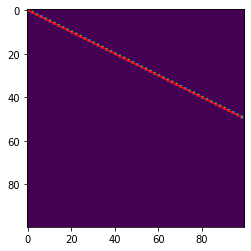

In [ ]:
im = np.zeros((100,100))
for i in range(0,100):
  for j in range(0,100):
    if(j == 2*i):
      im[i,j] = 1

# xs, ys = np.nonzero(diag)
# reg = stats.linregress(xs, ys)
xs, ys, reg = im_to_line(im)
disp_line_im(im, reg, ys)
# plt.plot(reg.intercept + reg.slope*ys, ys,  '-r')
# print(reg.slope)
# plt.imshow(im, aspect='equal')

In [ ]:
# trunk_cols
# points = (np.vstack([trunk_cols, trunk_rows]) - np.array([col, row]).reshape((2,1)))
# print(points.shape)

# displacements = np.dot(n.reshape((2,1)).T, points)
# print(displacements.shape)
# plt.hist(displacements.flatten())
# std = np.std(displacements)
# print(std)

NameError: ignored

7.771561172376096e-16


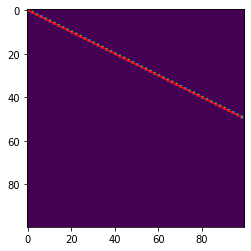

In [ ]:
xs, ys, reg = im_to_line_d(im)
slope = reg.slope
n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
dot_dist = np.dot(n, (ys,xs))
print(dot_dist.sum())

## Trunk Segmentation Functions

In [ ]:
def findTrunkSegs(seg_tree_im, ground_truth_image, threshold = .75):  
  # thresh = .85
  trunk_segs = []
  for i in range(0, np.amax(seg_tree_im)):
    num_total = np.count_nonzero(seg_tree_im[seg_tree_im == i])
    num_within = np.count_nonzero(ground_truth_image[seg_tree_im == i])

    if (num_total * threshold <= num_within and (num_total >= 10)):
      trunk_segs.append(i)


  for i in range(0, len(trunk_segs)):
    seg_tree_im[seg_tree_im == trunk_segs[i]] = -1
    
  seg_tree_im[seg_tree_im != -1] = 0
  seg_tree_im[seg_tree_im == -1] = 1

  plt.imshow(seg_tree_im)
  return trunk_segs

def segmentAndFindTrunk(im_num, threshold=.75, sigma=0, n_segments=100, compactness=10.0, max_iter=10):
  tree_im = np.load(str("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy").format(im_num+1))
  ground_truth = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(im_num))

  segmented_im = skimage.segmentation.slic(tree_im, n_segments, compactness, max_iter, sigma)
  max_int = np.amax(segmented_im)
  trunks = findTrunkSegs(segmented_im, ground_truth, threshold)
  return max_int, trunks

def segmentAndFindTrunk2(im_num, threshold=.75, sigma=0, n_segments=100, compactness=10.0, max_iter=10):
  tree_im = np.load(str("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy").format(im_num+1))
  ground_truth = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(im_num))

  segmented_im = skimage.segmentation.slic(tree_im, n_segments, compactness, max_iter, sigma)
  return (findTrunkSegs(segmented_im, ground_truth, threshold), (np.amax(segmented_im)))

## Feature Factor Extraction Functions

In [ ]:
def find_avg_color(identity, channel):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  segmented_im = skimage.segmentation.slic(tree_im)
  return np.average(tree_im[segmented_im == seg_num][:, channel])

def find_color_std(identity, channel):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  segmented_im = skimage.segmentation.slic(tree_im)
  return np.std(tree_im[segmented_im == seg_num][:, channel])

def find_color_skew(identity, channel):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  segmented_im = skimage.segmentation.slic(tree_im)
  return scipy.stats.skew(tree_im[segmented_im == seg_num][:, channel])

def find_color_kurtosis(identity, channel):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  segmented_im = skimage.segmentation.slic(tree_im)
  return scipy.stats.kurtosis(tree_im[segmented_im == seg_num][:, channel])

def find_canny_avg(identity):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  canny = cv.Canny(tree_im, 50, 200)
  segmented_im = skimage.segmentation.slic(tree_im)
  return np.average(canny[segmented_im == seg_num])

def find_canny_std(identity):
  im_num = identity[0] + 1
  seg_num = identity[1]
  truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  canny = cv.Canny(tree_im, 50, 200)
  segmented_im = skimage.segmentation.slic(tree_im)
  return np.std(canny[segmented_im == seg_num])

## Pre-Processesing and Saving Segmentations of Images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


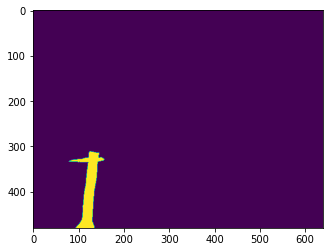

In [ ]:
# ARRAY - [IMAGE-NUM, BLOB_NUMBER, VAL]
# This will probably take a while as its terribly written
# DONT RERUN UNLESS NECESSARY 
labeled_blobs = []
for i in range(0, 349):
  maxi, trunk_segs = segmentAndFindTrunk(i, threshold=.50)
  for j in range(0,maxi):
    if j in trunk_segs:
      labeled_blobs.append([i,j,1])
    else:
      labeled_blobs.append([i,j,0])

np.save('/content/drive/MyDrive/Lidar Trees/Info/labeled_segments.npy', labeled_blobs)

In [ ]:
# Load and select equal tree and non tree segments
labeled_segments = np.load('/content/drive/MyDrive/Lidar Trees/Info/labeled_segments.npy')
print(np.shape(labeled_segments))

(27041, 3)


In [ ]:
# np.count_nonzero(labeled_segments[labeled_segments == 1])
truth_vals = labeled_segments[:,2]
print(np.shape(truth_vals))

trunk_indexes = np.nonzero(truth_vals)

print(np.count_nonzero(truth_vals))
print(trunk_indexes)
trunk_indexes = np.array(trunk_indexes)[0]

In [ ]:
import random

print(trunk_indexes)
random_indexes = random.sample(range(1, 27000), 59)
random_indexes = np.array(random_indexes)
random_indexes = np.sort(random_indexes)
print(random_indexes)

np.in1d(trunk_indexes, random_indexes).any()

In [ ]:
# combine indexes to make finalized array

all_indexes = np.concatenate((trunk_indexes, random_indexes), axis=None)
print(np.shape(all_indexes))
print(all_indexes)

In [ ]:
# Make array of labeled_blobs that is made up of above indeces

training_segments = labeled_segments[all_indexes]
print(np.shape(training_segments))
print(training_segments)
np.save('/content/drive/MyDrive/Lidar Trees/Info/training_segments.npy', training_segments)

In [ ]:
train_segments = np.load('/content/drive/MyDrive/Lidar Trees/Info/training_segments.npy')
print(train_segments)

In [ ]:
avg_colors = []
for i in range(0, len(train_segments)):
  avg_colors.append(np.array([find_avg_color(train_segments[i], 0), find_avg_color(train_segments[i], 1), find_avg_color(train_segments[i], 2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


In [ ]:
# print(np.array(avg_colors[0:20]))
avg_colors = np.array(avg_colors)
np.save('/content/drive/MyDrive/Lidar Trees/Info/avg_colors.npy', avg_colors)

In [ ]:
color_std = []
color_skew = []
color_kurt = []
canny_avg = []
canny_std = []
for i in range(0, len(train_segments)):
  color_std.append(np.array([find_color_std(train_segments[i], 0), find_color_std(train_segments[i], 1), find_color_std(train_segments[i], 2)]))
  color_skew.append(np.array([find_color_skew(train_segments[i], 0), find_color_skew(train_segments[i], 1), find_color_skew(train_segments[i], 2)]))
  color_kurt.append(np.array([find_color_kurtosis(train_segments[i], 0), find_color_kurtosis(train_segments[i], 1), find_color_kurtosis(train_segments[i], 2)]))
  canny_avg.append(np.array([find_canny_avg(train_segments[i])]))
  canny_std.append(np.array([find_canny_std(train_segments[i])]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
/usr/local/lib/python3.7/

In [ ]:
color_std = np.array(color_std)
color_skew = np.array(color_skew)
color_kurt = np.array(color_kurt)
canny_avg = np.array(canny_avg)
canny_std = np.array(canny_std)
np.save('/content/drive/MyDrive/Lidar Trees/Info/color_std.npy', color_std)
np.save('/content/drive/MyDrive/Lidar Trees/Info/color_skew.npy', color_skew)
np.save('/content/drive/MyDrive/Lidar Trees/Info/color_kurt.npy', color_kurt)
np.save('/content/drive/MyDrive/Lidar Trees/Info/canny_avg.npy', canny_avg)
np.save('/content/drive/MyDrive/Lidar Trees/Info/canny_std.npy', canny_std)

In [ ]:
from google.colab import drive
from scipy import ndimage as ndi
from scipy.ndimage import label
from scipy import stats

import scipy.ndimage as ndimage
from skimage import measure
from skimage import filters
from skimage.filters import sobel
from skimage import morphology
from skimage.segmentation import watershed
import skimage.segmentation
from skimage.segmentation import mark_boundaries
import sys
import numpy as np
import math
import scipy
from scipy import stats
# !pip install OpenEXR
# import OpenEXR
import math
from PIL import Image
import glob
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib.gridspec import GridSpec
from IPython.display import HTML
import matplotlib.animation as animation
import cv2
import cv2 as cv
from skimage.filters import median
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# drive._mount('/content/drive')
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

# Wider Tree - EA07y - Red Juniper - .007m
# Thinner Tree - EA12y - Eastern White Pine


Mounted at /content/drive


In [ ]:
def find_features(im_num, seg_num):
  # im_num = identity[0] + 1
  # seg_num = identity[1]
  # truth_val = identity[2]
  tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(im_num))
  segmented_im = skimage.segmentation.slic(tree_im) # Being redone each segment 
  canny = cv.Canny(tree_im, 50, 200)                # '''

  # COLOR FEATURES
  r_avg = np.average(tree_im[segmented_im == seg_num][:, 0])
  g_avg = np.average(tree_im[segmented_im == seg_num][:, 1])
  b_avg = np.average(tree_im[segmented_im == seg_num][:, 2])

  r_std = np.std(tree_im[segmented_im == seg_num][:, 0])
  g_std = np.std(tree_im[segmented_im == seg_num][:, 1])
  b_std = np.std(tree_im[segmented_im == seg_num][:, 2])

  r_skew = scipy.stats.skew(tree_im[segmented_im == seg_num][:, 0])
  g_skew = scipy.stats.skew(tree_im[segmented_im == seg_num][:, 1])
  b_skew = scipy.stats.skew(tree_im[segmented_im == seg_num][:, 2])

  r_kurt = scipy.stats.kurtosis(tree_im[segmented_im == seg_num][:, 0])
  g_kurt = scipy.stats.kurtosis(tree_im[segmented_im == seg_num][:, 1])
  b_kurt = scipy.stats.kurtosis(tree_im[segmented_im == seg_num][:, 2])

  # CANNY FEATURES
  canny_avg = np.average(canny[segmented_im == seg_num])
  canny_std = np.std(canny[segmented_im == seg_num])
  
  return np.array((r_avg, g_avg, b_avg, r_std, g_std, b_std, r_skew, g_skew, b_skew, r_kurt, g_kurt, b_kurt, canny_avg, canny_std))

def display_output_trunks(tree_im, seg_im, labeled_segs):
  for i in range(0, len(labeled_segs)):
    if labeled_segs[i] == 0:
      seg_im[seg_im == i] = 0
      tree_im[seg_im == i] = 0

  fig = plt.figure(figsize=(12, 5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  fig.suptitle('Output Logistic Regression')
  ax1.imshow(seg_im)
  ax2.imshow(tree_im)

  for a in (ax1, ax2):
    a.axis('off')
  plt.tight_layout()

def group_trunk_segs(tree_im, seg_im, labeled_segs):
  seg_im[seg_im != 0] = 1
  connected_trunks, num_trunks = label(seg_im)
  plt.imshow(connected_trunks)
  return connected_trunks

## Load in Training Data

In [ ]:
avg_colors = np.load('/content/drive/MyDrive/Lidar Trees/Info/avg_colors.npy')
color_std = np.load('/content/drive/MyDrive/Lidar Trees/Info/color_std.npy')
color_skew = np.load('/content/drive/MyDrive/Lidar Trees/Info/color_skew.npy')
color_kurt = np.load('/content/drive/MyDrive/Lidar Trees/Info/color_kurt.npy')
canny_avg = np.load('/content/drive/MyDrive/Lidar Trees/Info/canny_avg.npy')
canny_std = np.load('/content/drive/MyDrive/Lidar Trees/Info/canny_std.npy')

training_segments = np.load('/content/drive/MyDrive/Lidar Trees/Info/training_segments.npy')

training_num = 79

In [ ]:
print(training_segments[0])

print(training_segments[training_num:90])
# tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(145))


[ 0 62  1]
[[139  41   0]
 [145  63   0]
 [150  61   0]
 [169  69   0]
 [174  29   0]
 [188  23   0]
 [202  18   0]
 [205   5   0]
 [206  11   0]
 [208  58   0]
 [216  37   0]]


In [ ]:
df = pd.DataFrame({"R_MEAN":avg_colors[:,0], "G_MEAN":avg_colors[:,1], "B_MEAN":avg_colors[:,2],
                   "R_STD":color_std[:,0],   "G_STD":color_std[:,1],   "B_STD":color_std[:,2], 
                   "R_SKEW":color_skew[:,0], "G_SKEW":color_skew[:,1], "B_SKEW":color_skew[:,2],
                   "R_KURT":color_kurt[:,0], "G_KURT":color_kurt[:,1], "B_KURT":color_kurt[:,2],
                   "CAN_AVG":canny_avg[:,0], "CAN_STD":canny_std[:,0]})

In [ ]:
target = np.ones((len(avg_colors), ))
target[59:] = 0
df["target"] = target
df.head()

R_MEAN     G_MEAN     B_MEAN     R_STD     G_STD     B_STD    R_SKEW  \
0  29.030941  30.086241  27.884134  7.933709  7.989860  6.719314  1.512759   
1  28.097544  28.718963  28.705321  9.184150  9.002433  7.119459  2.234989   
2  30.496366  31.673692  26.345567  9.492806  9.602662  7.008777  1.647655   
3  28.552527  29.395604  28.738901  9.438627  9.424540  7.193737  2.722761   
4  29.575904  30.691566  27.662651  8.892309  9.031807  7.254375  2.734450   

     G_SKEW    B_SKEW     R_KURT     G_KURT     B_KURT    CAN_AVG    CAN_STD  \
0  1.515827 -0.014932   8.714646   8.717640   1.739358  11.247531  52.360419   
1  2.152223  0.494741  12.454848  11.501425   2.307823   9.740791  48.877590   
2  1.820683  0.922651   4.758696   5.572120   2.664991  18.068677  65.429623   
3  2.671724  0.667111  16.380961  15.937584   3.561121  10.087912  49.705650   
4  2.884675  1.504106  17.305470  18.464269  10.088646   9.831325  49.095142   

   target  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0

In [ ]:
df.describe()

R_MEAN      G_MEAN      B_MEAN       R_STD       G_STD       B_STD  \
count  118.000000  118.000000  118.000000  118.000000  118.000000  118.000000   
mean    45.252009   47.755883   35.869057   15.008629   15.437047   12.550453   
std     33.928731   34.293707   26.916544    9.156024    9.714512   10.367333   
min      6.758001    8.685851    4.734700    3.716984    3.817338    2.304259   
25%     24.591911   27.391610   18.595955    7.456049    7.764448    6.720755   
50%     30.286364   32.084373   27.850801   11.730231   12.661865    9.063760   
75%     51.654306   53.692829   40.758085   20.692701   21.746242   16.740870   
max    120.262067  123.494525  147.630068   37.153410   42.908718   56.327865   

           R_SKEW      G_SKEW      B_SKEW      R_KURT      G_KURT      B_KURT  \
count  118.000000  118.000000  118.000000  118.000000  118.000000  118.000000   
mean     1.529250    1.502022    1.275831    5.971187    6.438865    5.903832   
std      1.310255    1.457810    1.465362    7.371508    7.918404    8.189334   
min     -2.376674   -4.635685   -3.003693   -1.496834   -1.492118   -1.484080   
25%      0.552359    0.591417    0.396261    0.220783    0.272288    0.854483   
50%      1.636378    1.653924    1.156417    2.800354    3.237940    2.870898   
75%      2.302769    2.395690    2.010937    9.841851   10.955095    8.168505   
max      5.268540    5.167592    6.157221   33.746315   33.998979   48.072204   

          CAN_AVG     CAN_STD      target  
count  118.000000  118.000000  118.000000  
mean    19.943167   56.928136    0.500000  
std     18.373715   33.492368    0.502132  
min      0.000000    0.000000    0.000000  
25%      5.748086   37.850328    0.000000  
50%     16.878119   63.395892    0.500000  
75%     29.918099   82.060863    1.000000  
max     78.936007  117.888883    1.000000

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
# print(X[0:10])
# print(y[0:10])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# lr = LogisticRegression(random_state=0).fit(X_train,y_train)
# y_hat_train = lr.predict(X_train)
# y_hat_test = lr.predict(X_test)
# print(classification_report(y_train, y_hat_train))
# print(classification_report(y_test, y_hat_test))

lr = LogisticRegression(random_state=0).fit(X,y)
y_hat_train = lr.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(np.shape(X))
print(np.shape(y))

(118, 14)
(118,)


In [ ]:
y_output = lr.predict(X)
print(y_output)
print(classification_report(y, y_output))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        59
         1.0       0.95      1.00      0.98        59

    accuracy                           0.97       118
   macro avg       0.98      0.97      0.97       118
weighted avg       0.98      0.97      0.97       118



In [ ]:
tree_im1 = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame{}.npy".format(1))
seg_im = skimage.segmentation.slic(tree_im1)
tree_im_features = []
for i in range(0, np.amax(seg_im)):
  tree_im_features.append(find_features(1, i))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


In [ ]:
tree_im_features = np.array(tree_im_features)
# print(tree_im_features[0:10])

trunks_perhaps = lr.predict(tree_im_features)

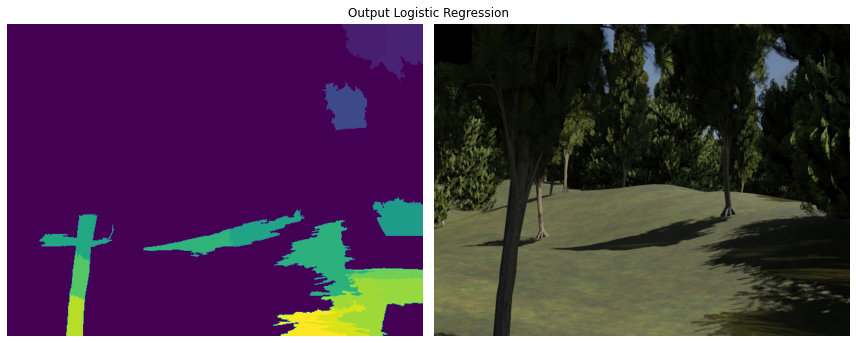

In [ ]:
display_output_trunks(tree_im1, seg_im, trunks_perhaps)

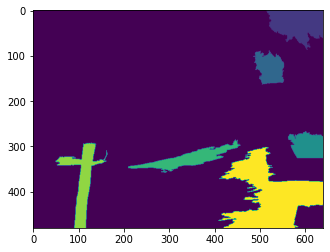

In [ ]:
connected_segs = group_trunk_segs(tree_im1, seg_im, trunks_perhaps)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


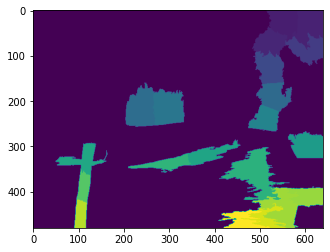

In [ ]:
print(trunks_perhaps)
for i in range(0, len(trunks_perhaps)):
  if trunks_perhaps[i] == 0:
    seg_im[seg_im == i] = 0
plt.imshow(seg_im)

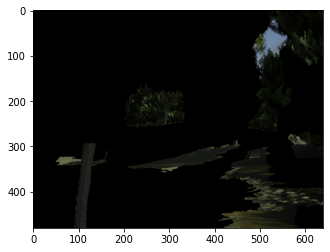

In [ ]:
for i in range(0, len(trunks_perhaps)):
  if trunks_perhaps[i] == 0:
    tree_im1[seg_im == i] = 0

plt.imshow(tree_im1)

In [ ]:
print(y[4:30])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
print(y_hat_test)


[1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]


In [ ]:
print(all_inputs[0:20])

[[29.03094141 30.08624095 27.8841343 ]
 [28.09754434 28.71896317 28.7053206 ]
 [30.49636628 31.67369186 26.34556686]
 [28.55252747 29.3956044  28.7389011 ]
 [29.57590361 30.69156627 27.6626506 ]
 [28.45947712 29.2627451  28.85947712]
 [29.8170581  30.85743717 25.96250515]
 [29.11222172 29.93639255 28.57973648]
 [41.91536458 42.78483073 35.12923177]
 [55.22912333 56.751263   42.90074294]
 [33.83597258 35.86575278 25.42826755]
 [29.49076267 30.50828991 27.85883468]
 [30.15814638 31.15005517 25.71257815]
 [34.065      35.98735294 25.65088235]
 [26.99615569 28.39836617 22.1220567 ]
 [25.06921529 27.08973843 19.98551308]
 [30.19181342 32.29319372 22.50452166]
 [28.00224871 29.68270744 23.21497639]
 [38.40702656 38.79005998 33.76149672]
 [22.53866366 25.06456456 17.11936937]]


In [ ]:
print(avg_colors[0:20])

[[29.03094141 30.08624095 27.8841343 ]
 [28.09754434 28.71896317 28.7053206 ]
 [30.49636628 31.67369186 26.34556686]
 [28.55252747 29.3956044  28.7389011 ]
 [29.57590361 30.69156627 27.6626506 ]
 [28.45947712 29.2627451  28.85947712]
 [29.8170581  30.85743717 25.96250515]
 [29.11222172 29.93639255 28.57973648]
 [41.91536458 42.78483073 35.12923177]
 [55.22912333 56.751263   42.90074294]
 [33.83597258 35.86575278 25.42826755]
 [29.49076267 30.50828991 27.85883468]
 [30.15814638 31.15005517 25.71257815]
 [34.065      35.98735294 25.65088235]
 [26.99615569 28.39836617 22.1220567 ]
 [25.06921529 27.08973843 19.98551308]
 [30.19181342 32.29319372 22.50452166]
 [28.00224871 29.68270744 23.21497639]
 [38.40702656 38.79005998 33.76149672]
 [22.53866366 25.06456456 17.11936937]]


In [ ]:
train_segments[0,0]

0

In [ ]:
tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame1.npy")
segmented_im = skimage.segmentation.slic(tree_im)
avg_color_val = np.average(tree_im[segmented_im == 62][:,2])
print(avg_color_val)

std = np.std(tree_im[segmented_im == 62][:,2])
print(std)

skew = scipy.stats.skew(tree_im[segmented_im == 62][:,2])
print(skew)

kurt = scipy.stats.kurtosis(tree_im[segmented_im == 62][:,2])
print(kurt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


27.88413429888084
6.719314110649937
-0.014931749274486494
1.7393579489503894


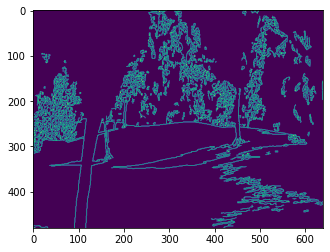

In [ ]:
can = cv.Canny(tree_im, 50, 200)
plt.imshow(can)

In [ ]:
tree_im[segmented_im == 62][:,0]

array([15, 14, 18, ..., 42, 48, 54], dtype=uint8)

In [ ]:
print(find_avg_color(train_segments[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


29.00043888523151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


max 84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


Trunk Seg [62, 75]
84
[0, 0, 0]
[0, 1, 0]
[0, 2, 0]
[0, 3, 0]
[0, 4, 0]
[0, 5, 0]
[0, 6, 0]
[0, 7, 0]
[0, 8, 0]
[0, 9, 0]
[0, 10, 0]
[0, 11, 0]
[0, 12, 0]
[0, 13, 0]
[0, 14, 0]
[0, 15, 0]
[0, 16, 0]
[0, 17, 0]
[0, 18, 0]
[0, 19, 0]
[0, 20, 0]
[0, 21, 0]
[0, 22, 0]
[0, 23, 0]
[0, 24, 0]
[0, 25, 0]
[0, 26, 0]
[0, 27, 0]
[0, 28, 0]
[0, 29, 0]
[0, 30, 0]
[0, 31, 0]
[0, 32, 0]
[0, 33, 0]
[0, 34, 0]
[0, 35, 0]
[0, 36, 0]
[0, 37, 0]
[0, 38, 0]
[0, 39, 0]
[0, 40, 0]
[0, 41, 0]
[0, 42, 0]
[0, 43, 0]
[0, 44, 0]
[0, 45, 0]
[0, 46, 0]
[0, 47, 0]
[0, 48, 0]
[0, 49, 0]
[0, 50, 0]
[0, 51, 0]
[0, 52, 0]
[0, 53, 0]
[0, 54, 0]
[0, 55, 0]
[0, 56, 0]
[0, 57, 0]
[0, 58, 0]
[0, 59, 0]
[0, 60, 0]
[0, 61, 0]
[0, 62, 1]
[0, 63, 0]
[0, 64, 0]
[0, 65, 0]
[0, 66, 0]
[0, 67, 0]
[0, 68, 0]
[0, 69, 0]
[0, 70, 0]
[0, 71, 0]
[0, 72, 0]
[0, 73, 0]
[0, 74, 0]
[0, 75, 1]
[0, 76, 0]
[0, 77, 0]
[0, 78, 0]
[0, 79, 0]
[0, 80, 0]
[0, 81, 0]
[0, 82, 0]
[0, 83, 0]


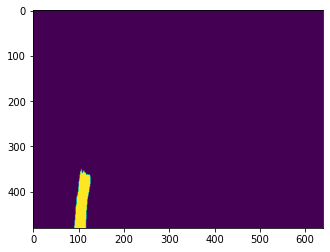

In [ ]:
tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame1.npy")
seg_im = skimage.segmentation.slic(tree_im)
plt.imshow(seg_im)
print('max', np.amax(seg_im))
maxi, trunk_segs = segmentAndFindTrunk(0, threshold=.50)
# trunk_segs, maxi = segmentAndFindTrunk(0)
print('Trunk Seg', trunk_segs)
print(maxi)
for j in range(0,maxi):
  if j in trunk_segs:
    print([0,j,1])
  else:
    print([0,j,0])

In [ ]:
print(np.shape(labeled_blobs))

np_labeled_blobs = np.array(labeled_blobs)
print(np.count_nonzero(np_labeled_blobs[:,2] == 1))

(27041, 3)
59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


(84, [40, 50, 62, 75])

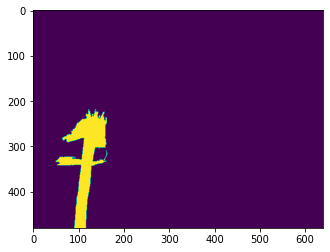

In [ ]:
segmentAndFindTrunk(0, threshold=.30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


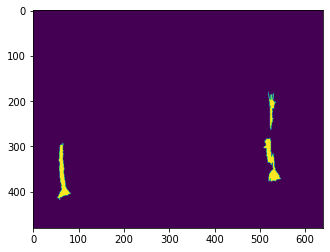

In [ ]:

segmentAndFindTrunk(25, compactness=5, n_segments=500, threshold=.75)

# ***Image Segmentation Techniques***

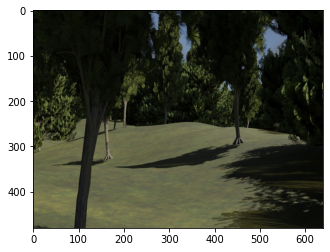

In [ ]:
tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame1.npy")
plt.imshow(tree_im)

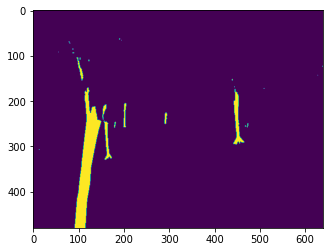

In [ ]:
ground_truth_im = np.load("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy")
plt.imshow(ground_truth_im)

In [ ]:
np.shape(tree_im)
vimage = tree_im.reshape(tree_im.shape[0]*tree_im.shape[1], tree_im.shape[2])[:,:3]
vimage.shape

(307200, 3)

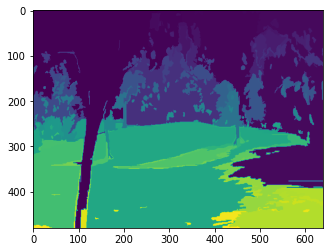

In [ ]:
res1 = skimage.segmentation.felzenszwalb(tree_im, scale=300)
# res2 = skimage.segmentation.felzenszwalb(tree_im, scale=1000)

plt.imshow(res1)

Text(0.5, 0.98, 'Plotting the boundaries')

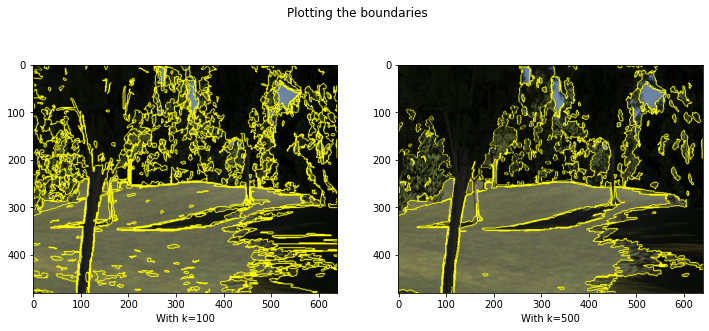

In [ ]:
res3 = skimage.segmentation.felzenszwalb(tree_im, scale=100)
res4 = skimage.segmentation.felzenszwalb(tree_im, scale=500)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(mark_boundaries(tree_im, res3)); ax1.set_xlabel("With k=100")
ax2.imshow(mark_boundaries(tree_im, res4)); ax2.set_xlabel("With k=500")

fig.suptitle("Plotting the boundaries")

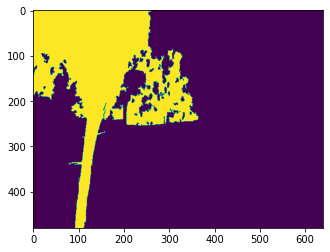

In [ ]:
# Falzenswab, scale = 500
res4[res4 == 0] = -1
res4[res4 != -1] = 0
res4[res4 == -1] = 1
plt.imshow(res4)

0


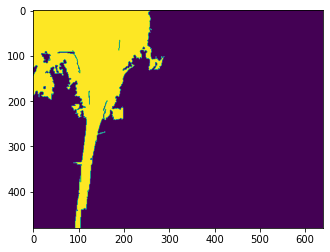

In [ ]:
print(res1[400,105])

# Falzenswab, scale = 300
res1[res1 == 0] = -1
res1[res1 != -1] = 0
res1[res1 == -1] = 1
plt.imshow(res1)

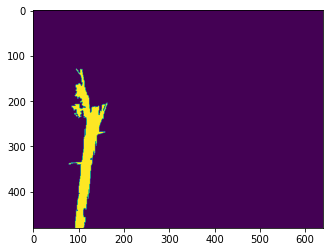

In [ ]:
# Falzenswab, scale = 100
res3[res3 == 197] = -1
res3[res3 != -1] = 0
res3[res3 == -1] = 1
plt.imshow(res3)

87 70 52


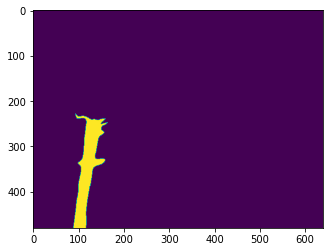

In [ ]:
print(slic2[450, 100], slic2[380, 103], slic2[300, 115])
slic2[slic2 == 87] = -1
slic2[slic2 == 70] = -1
slic2[slic2 == 52] = -1
slic2[slic2 != -1] = 0
slic2[slic2 == -1] = 1
plt.imshow(slic2)

In [ ]:
# QuickShift
print(qs[350,110], qs[300,115])
qs[qs == 64] = -1
qs[qs == 103] = -1
qs[qs == 116] = -1
qs[qs == 133] = -1
qs[qs != -1] = 0
qs[qs == -1] = 1
plt.imshow(qs)

NameError: ignored

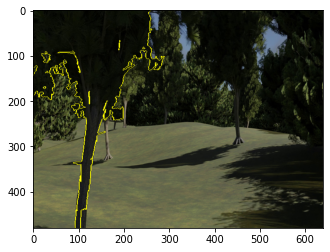

In [ ]:
plt.imshow(mark_boundaries(tree_im, res1))
# plt.label("With k=300")

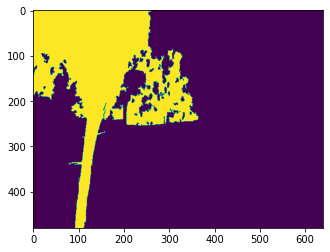

In [ ]:
plt.imshow(res4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


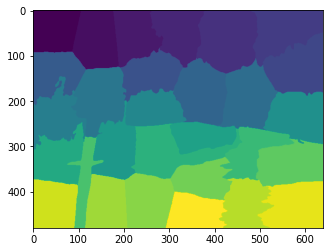

In [ ]:
slic1 = skimage.segmentation.slic(tree_im, n_segments=30, compactness=30, max_iter=20, sigma=2)
plt.imshow(slic1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


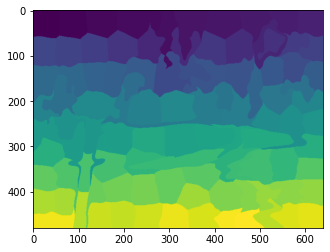

In [ ]:
slic2 = skimage.segmentation.slic(tree_im, sigma=5)
plt.imshow(slic2)

In [ ]:
thresh = .50
trunk_segs = []
for i in range(0, np.amax(slic2)):
  num_total = np.count_nonzero(slic2[slic2 == i])
  num_within = np.count_nonzero(ground_truth_im[slic2 == i])

  if (num_total * thresh <= num_within and (num_total >= 10)):
    print(i)
    trunk_segs.append(i)

52
70
87


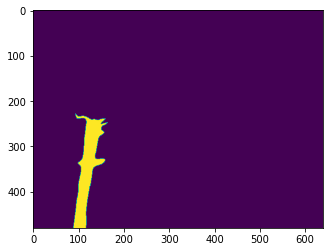

In [ ]:
# slic2[slic2 == 52] = -1
# slic2[slic2 == 70] = -1
# slic2[slic2 == 87] = -1

for i in range(0, len(trunk_segs)):
  slic2[slic2 == trunk_segs[i]] = -1
  
slic2[slic2 != -1] = 0
slic2[slic2 == -1] = 1

plt.imshow(slic2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


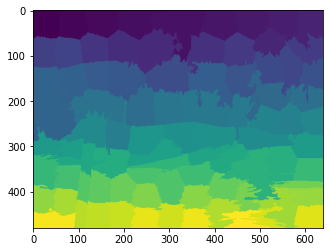

In [ ]:
slic3 = skimage.segmentation.slic(tree_im, sigma=0, n_segments=100, max_iter=10, compactness=10)
plt.imshow(slic3)

62
75


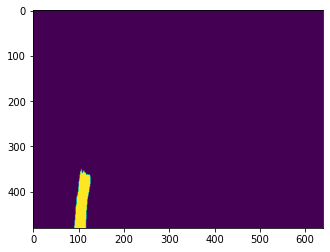

In [ ]:
thresh = .60
trunk_segs = []
for i in range(0, np.amax(slic3)):
  num_total = np.count_nonzero(slic3[slic3 == i])
  num_within = np.count_nonzero(ground_truth_im[slic3 == i])

  if (num_total * thresh <= num_within and (num_total >= 10)):
    print(i)
    trunk_segs.append(i)


for i in range(0, len(trunk_segs)):
  slic3[slic3 == trunk_segs[i]] = -1
  
slic3[slic3 != -1] = 0
slic3[slic3 == -1] = 1

plt.imshow(slic3)

82
93


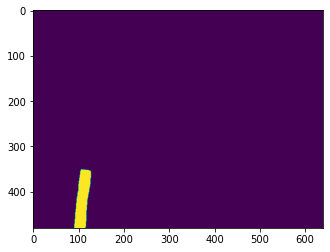

In [ ]:
findTrunkSegs(slic3, ground_truth_im)

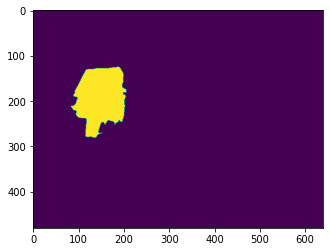

In [ ]:
slic1[slic1 != 11] = 0
plt.imshow(slic1)

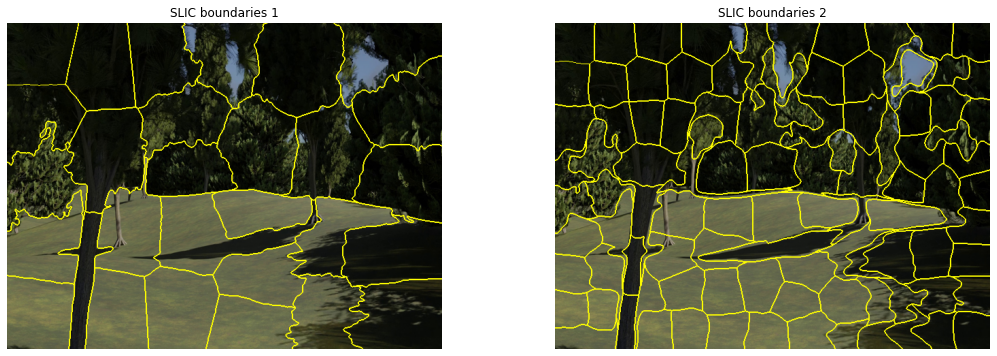

In [ ]:
slic1_mb = skimage.segmentation.mark_boundaries(tree_im, slic1)
slic2_mb = skimage.segmentation.mark_boundaries(tree_im, slic2)

fig, axs = plt.subplots(1,2, figsize=(18,6))
_ = axs[0].imshow(slic1_mb)
_ = axs[0].axis('off')
_ = axs[0].set_title('SLIC boundaries 1')
_ = axs[1].imshow(slic2_mb)
_ = axs[1].axis('off')
_ = axs[1].set_title('SLIC boundaries 2')

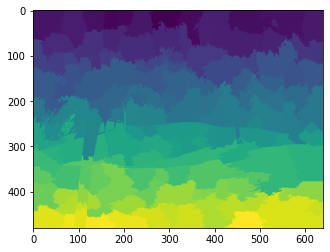

In [ ]:
quickshift = skimage.segmentation.quickshift(tree_im, ratio=.9, kernel_size=5, max_dist=50) # ratio 0-1 with 1 only caring about color and 0 about distance
plt.imshow(quickshift)

In [ ]:
qs = quickshift

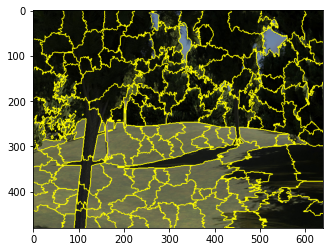

In [ ]:
qs_bound = skimage.segmentation.mark_boundaries(tree_im, qs)
plt.imshow(qs_bound)

In [ ]:
km3 = KMeans(n_clusters=3)
km3.fit(vimage)
label3image = km3.predict(vimage)

In [ ]:
imsz = tree_im.shape
imsz = list(imsz)
imsz[-1] = 3
label3image = label3image.reshape(imsz[:2])*(1/label3image.max())
label3image.shape

(480, 640)

In [ ]:
fig, ax = plt.subplots()
_ = ax.imshow(label3image, cmap='tab20')
_ = ax.axis('off')

In [ ]:
km10 = KMeans(n_clusters=10)
km10.fit(vimage)
label10image = km10.predict(vimage)
label10image = label10image.reshape(imsz[:2])*(1/label10image.max())
fig, ax = plt.subplots()
_ = ax.imshow(label10image, cmap='tab20')
_ = ax.axis('off')

In [ ]:
gsvimage = vimage.mean(axis=1)
gsimage = gsvimage.reshape((imsz[0],imsz[1]))
chroma = vimage-np.expand_dims(gsvimage,axis=1)
cmax, cmin = chroma.max(), chroma.min()

nchroma = (chroma - cmin)*(cmax-cmin)**(-1)

plt.imshow(nchroma.reshape(imsz))

In [ ]:
kmChr10 = KMeans(n_clusters=10)
kmChr3 = KMeans(n_clusters=3)
kmChr5 = KMeans(n_clusters=5)

kmChr10.fit(nchroma)
labelkmChr10 = kmChr10.predict(nchroma)
labelkmChr10 = labelkmChr10.reshape(imsz[:2])*(1/labelkmChr10.max())

kmChr3.fit(nchroma)
labelkmChr3 = kmChr3.predict(nchroma)
labelkmChr3 = labelkmChr3.reshape(imsz[:2])*(1/labelkmChr3.max())

kmChr5.fit(nchroma)
labelkmChr5 = kmChr5.predict(nchroma)
labelkmChr5 = labelkmChr5.reshape(imsz[:2])*(1/labelkmChr5.max())

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(24,6))
_ = axs[0].imshow(label3image, cmap='tab20')
_ = axs[0].axis('off')
_ = axs[0].set_title('K Means 3')
_ = axs[1].imshow(label10image, cmap='tab20')
_ = axs[1].axis('off')
_ = axs[1].set_title('K Means 10')
_ = axs[2].imshow(labelkmChr3, cmap='tab20')
_ = axs[2].axis('off')
_ = axs[2].set_title('K Means Chroma 3')
_ = axs[3].imshow(labelkmChr5, cmap='tab20')
_ = axs[3].axis('off')
_ = axs[3].set_title('K Means Chroma 5')
_ = axs[4].imshow(labelkmChr10, cmap='tab20')
_ = axs[4].axis('off')
_ = axs[4].set_title('K Means Chroma 10')

In [ ]:
bandwidth = estimate_bandwidth(nchroma, quantile=0.05, n_samples=2000)
msChr10 =  MeanShift(bandwidth=bandwidth, bin_seeding=True)

msChr10.fit(nchroma)
labelmsChr10 = msChr10.predict(nchroma)
labelmsChr10 = labelmsChr10.reshape(imsz[:2])*(1/labelmsChr10.max())
fig, axs = plt.subplots(1,2, figsize=(12,6))
_ = axs[0].imshow(labelmsChr10, cmap='tab20')
_ = axs[0].axis('off')
_ = axs[0].set_title('Mean Shift 18 Clusters')
_ = axs[1].imshow(label10image, cmap='tab20')
_ = axs[1].axis('off')
_ = axs[1].set_title('K Means 10')

In [ ]:
print(len(msChr10.cluster_centers_))

In [ ]:
tree_im = np.load("/content/drive/MyDrive/Lidar Trees/Renders/NPY Frames/frame1.npy")
plt.imshow(tree_im)
tree_im.shape

In [ ]:
# Graph Cut
img = tree_im
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,150,200,400)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
vimage = img.reshape(img.shape[0]*img.shape[1], img.shape[2])[:,:3]
vimage.shape

km3.fit(vimage)
label3image = km3.predict(vimage)

imsz = img.shape
imsz = list(imsz)
imsz[-1] = 3
label3image = label3image.reshape(imsz[:2])*(1/label3image.max())

fig, axs = plt.subplots(1,1, figsize=(12,6))
_ = axs.imshow(label3image, cmap='tab20')
_ = axs.axis('off')
_ = axs.set_title('K Means 3')

In [ ]:
img = tree_im
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(gray)

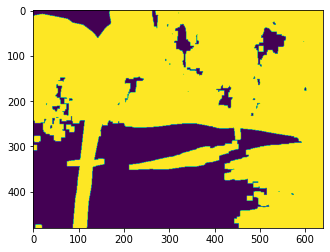

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

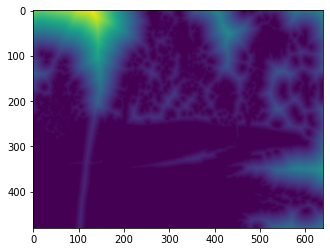

In [ ]:
plt.imshow(dist_transform)

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

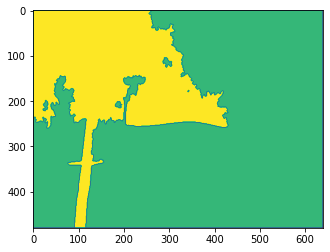

In [ ]:
# Watershed with markers
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)

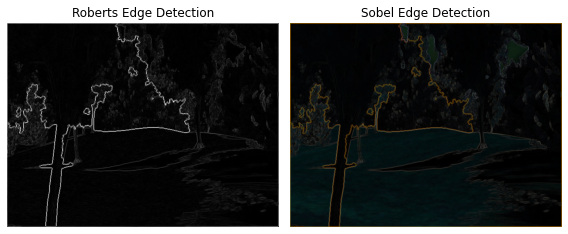

In [ ]:
img = tree_im
edge_roberts = filters.roberts(img[:,:,0])
edge_sobel = filters.sobel(img)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

(480, 640)


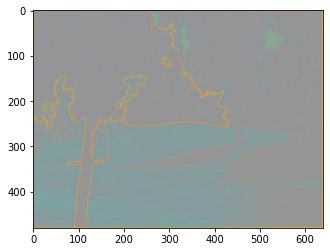

In [ ]:
print(edge_roberts.shape)
vimage = edge_sobel.reshape(tree_im.shape[0]*tree_im.shape[1], tree_im.shape[2])[:,:3]
gsvimage = vimage.mean(axis=1)
# gsimage = gsvimage.reshape((imsz[0],imsz[1]))
chroma = vimage-np.expand_dims(gsvimage,axis=1)
cmax, cmin = chroma.max(), chroma.min()

nchroma = (chroma - cmin)*(cmax-cmin)**(-1)

plt.imshow(nchroma.reshape(imsz))

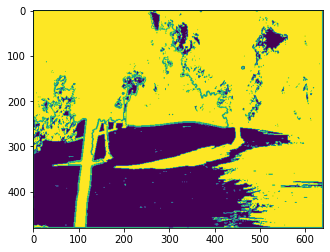

In [ ]:
kmChr3 = KMeans(n_clusters=3)


kmChr3.fit(nchroma)
robLabelkmChr3 = kmChr3.predict(nchroma)
robLabelkmChr3 = robLabelkmChr3.reshape(imsz[:2])*(1/robLabelkmChr3.max())
plt.imshow(robLabelkmChr3)

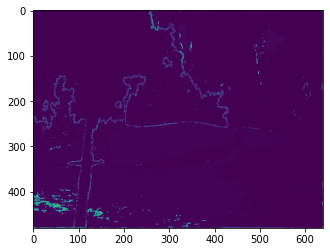

In [ ]:
bandwidth = estimate_bandwidth(nchroma, quantile=0.05, n_samples=2000)
msChr10 =  MeanShift(bandwidth=bandwidth, bin_seeding=True)

msChr10.fit(nchroma)
robLabelmsChr10 = msChr10.predict(nchroma)
robLabelmsChr10 = robLabelmsChr10.reshape(imsz[:2])*(1/robLabelmsChr10.max())
plt.imshow(robLabelmsChr10)

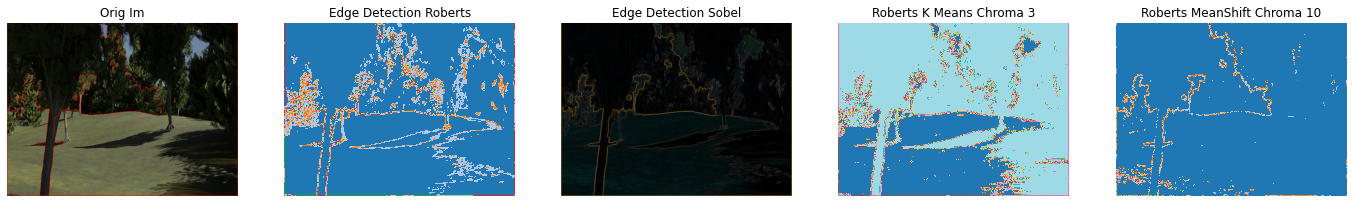

In [ ]:
fig, newaxs = plt.subplots(1,5, figsize=(24,6))
_ = newaxs[0].imshow(tree_im, cmap='tab20')
_ = newaxs[0].axis('off')
_ = newaxs[0].set_title('Orig Im')
_ = newaxs[1].imshow(edge_roberts, cmap='tab20')
_ = newaxs[1].axis('off')
_ = newaxs[1].set_title('Edge Detection Roberts')
_ = newaxs[2].imshow(edge_sobel, cmap='tab20')
_ = newaxs[2].axis('off')
_ = newaxs[2].set_title('Edge Detection Sobel')
_ = newaxs[3].imshow(robLabelkmChr3, cmap='tab20')
_ = newaxs[3].axis('off')
_ = newaxs[3].set_title('Roberts K Means Chroma 3')
_ = newaxs[4].imshow(robLabelmsChr10, cmap='tab20')
_ = newaxs[4].axis('off')
_ = newaxs[4].set_title('Roberts MeanShift Chroma 10')

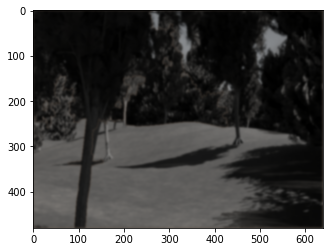

In [ ]:
from scipy.ndimage.filters import gaussian_filter
img = tree_im
blur = gaussian_filter(img, sigma = 2)
plt.imshow(blur)

In [ ]:
blur_vimg = blur.reshape(blur.shape[0]*blur.shape[1], blur.shape[2])[:,:3]

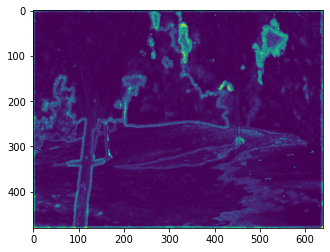

In [ ]:
bandwidth = estimate_bandwidth(nchroma, quantile=0.05, n_samples=2000)
msChr10 =  MeanShift(bandwidth=bandwidth, bin_seeding=True)

msChr10.fit(blur_vimg)
blurLabelmsChr10 = msChr10.predict(blur_vimg)
blurLabelmsChr10 = blurLabelmsChr10.reshape(imsz[:2])*(1/blurLabelmsChr10.max())
plt.imshow(blurLabelmsChr10)

## ***Trunk Width Measurement***

**New Equations (Hopefully Correct)**  
$Real = \frac{Width * Depth}{K(aka f)}$  
  
$Width = Real\frac{k}{Depth}$

### ***Trunk Width Measurement Functions***

In [ ]:
def disp_line_im(im, reg, ys):
  plt.plot(reg.intercept + reg.slope*ys, ys,  '-r')
  plt.imshow(im, aspect='equal')

def im_to_line(im):
  xs, ys = np.nonzero(im)
  reg = stats.linregress(xs, ys)

  return ys, xs, reg

def im_to_line_d(im):
  xs, ys = np.nonzero(im)
  reg = stats.linregress(xs, ys)
  # UNCOMMENT TO SHOW GRAPHS WHEN FINDING WIDTH
  # plt.plot(reg.intercept + reg.slope*xs, xs,  '-r')
  # plt.imshow(im, aspect='equal')
  return ys, xs, reg

def label_trunks(im):
  morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks
  labeled_trees, num = ndi.label(im)
  
def trunk_width(im):
  image = im
  x_mesh, y_mesh = np.meshgrid(np.linspace(0,639,640),np.linspace(0,479,480))
  xs, ys = np.nonzero(im)
  reg = stats.linregress(xs, ys)
  
  slope = reg.slope
  n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
  dot_dist = np.dot(n, (xs,ys))
  dist_std = np.std(dot_dist.flatten())

  # CIRCLE DISTANCES ROUND TWO
  c_row, c_col = ndimage.measurements.center_of_mass(im)
  c_row = math.floor(c_row)
  c_col = math.floor(c_col)
  dist_mask = np.sqrt((x_mesh - c_col)**2 + (y_mesh - c_row)**2) > dist_std * 3
  image[dist_mask == 1] = 0
  # plt.imshow(image)
  xs, ys, reg = im_to_line_d(image)

  slope = reg.slope
  n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])

  offset = np.dot(n,(c_row, c_col))
  dot_dist = np.dot(n, (ys,xs)) - offset

  trunk_diam = (np.max(dot_dist) - np.min(dot_dist))
  return trunk_diam

def trunk_width_imp(im):
  image = im
  x_mesh, y_mesh = np.meshgrid(np.linspace(0,im.shape[1] - 1,im.shape[1]),np.linspace(0,im.shape[0] - 1,im.shape[0]))
  xs, ys = np.nonzero(im)
  reg = stats.linregress(xs, ys)
  
  slope = reg.slope
  n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
  dot_dist = np.dot(n, (xs,ys))
  # print(dot_dist.sum())
  dist_std = np.std(dot_dist.flatten())

  # CIRCLE DISTANCES ROUND TWO
  c_row, c_col = ndimage.measurements.center_of_mass(im)
  c_row = math.floor(c_row)
  c_col = math.floor(c_col)
  dist_mask = np.sqrt((x_mesh - c_col)**2 + (y_mesh - c_row)**2) > dist_std * 3
  image[dist_mask == 1] = 0
  # plt.imshow(image)
  xs, ys, reg = im_to_line_d(image)

  slope = reg.slope
  n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])

  offset = np.dot(n,(c_row, c_col))
  dot_dist = np.dot(n, (ys,xs)) - offset

  trunk_diam = (np.max(dot_dist) - np.min(dot_dist))
  return (trunk_diam)
  
# CREATE MESHES
x_mesh, y_mesh = np.meshgrid(np.linspace(0,639,640),np.linspace(0,479,480))

def error_calc(real, exp):
  return(100*(real - exp) / real)

In [ ]:
# Block Helpers
def calc_width(im):
  im[im < 10] = 0
  im[im != 0] = 1

  return(trunk_width_imp(im))

def calc_depth(im, depth_im):
  depth_im[im != 1] = np.nan
  return(np.nanmean(depth_im))

def compare_block_images(im, depth_im):
  width = calc_width(im)
  depth = calc_depth(im, depth_im)
  return(width, depth)

def load_and_calculate_both(num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy').format(num))
  return(compare_block_images(im, depth_im))

def calculate_k_blocks(real_width, im, depth_im):
  width, depth = compare_block_images(im, depth_im)
  return((real_width * depth) / width)

def new_calculate_k_blocks(real_width, im, depth_im):
  width, depth = compare_block_images(im, depth_im)
  return((width * depth) / real_width)

def load_and_find_k_of_block(real_width, num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy').format(num))
  return(calculate_k_blocks(real_width, im, depth_im))

def new_load_and_find_k_of_block(real_width, num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy').format(num))
  return(new_calculate_k_blocks(real_width, im, depth_im))

def estimate_real_width(im, depth_im, k):
  width, depth = compare_block_images(im, depth_im)
  return((width*k)/depth)

def new_estimate_real_width(im, depth_im, k):
  width, depth = compare_block_images(im, depth_im)
  return((width*depth)/k)

def load_and_estimate_width(k, num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy').format(num))
  return(estimate_real_width(im, depth_im, k))

def new_load_and_estimate_width(k, num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image{}.npy').format(num))
  return(new_estimate_real_width(im, depth_im, k))

In [ ]:
# Trunk Helpers
def calc_widthT(im, tree_num):
  morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunk
  labeled_trees, num = ndi.label(im)
  labeled_trees[labeled_trees != tree_num] = 0
  return(trunk_width_imp(labeled_trees), labeled_trees)

def calc_widthT2(im, tree_num):
  morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunk
  labeled_trees, num = ndi.label(im)
  labeled_trees[labeled_trees != tree_num] = 0
  return(trunk_width(labeled_trees), labeled_trees)

def calc_depthT(labeled_trees, depth_im, tree_num):
  depth_im[labeled_trees != tree_num] = np.nan
  return(np.nanmean(depth_im))

def compare_tree_images(im, depth_im, tree_num):
  width, labeled_trees = calc_widthT(im, tree_num)
  depth = calc_depthT(labeled_trees, depth_im, tree_num)
  return(width, depth)

def load_and_compare_tree_images(im_num, tree_num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(im_num))
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy').format(im_num))
  width, labeled_trees = calc_widthT(im, tree_num)
  depth = calc_depthT(labeled_trees, depth_im, tree_num)
  return(width, depth)

def calculate_k_trees(real_width, im, depth_im, tree_num):
  width, depth = compare_tree_images(im, depth_im, tree_num)
  return((real_width * depth) / width)

def new_calculate_k_trees(real_width, im, depth_im, tree_num):
  width, depth = compare_tree_images(im, depth_im, tree_num)
  return((width * depth) / real_width)

def load_and_find_k_of_tree(real_width, num, tree_num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(num))
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy').format(num))
  return(calculate_k_trees(real_width, im, depth_im, tree_num))

def new_load_and_find_k_of_tree(real_width, num, tree_num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(num))
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy').format(num))
  return(new_calculate_k_trees(real_width, im, depth_im, tree_num))

def estimate_real_widthT(im, depth_im, k, tree_num):
  width, depth = compare_tree_images(im, depth_im, tree_num)
  return((width*k)/depth)

def load_and_estimate_widthT(k, num, tree_num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(num))[:,:,0]
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy').format(num))
  return(estimate_real_widthT(im, depth_im, k, tree_num))

def new_estimate_real_widthT(im, depth_im, k, tree_num):
  width, depth = compare_tree_images(im, depth_im, tree_num)
  return((width*depth)/k)

def new_load_and_estimate_widthT(k, num, tree_num):
  im = np.load(str("/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}.npy").format(num))
  depth_im = np.load(str('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth{}.npy').format(num))
  return(new_estimate_real_widthT(im, depth_im, k, tree_num))

In [ ]:
k1 = new_load_and_find_k_of_block(2, 1)
k2 = new_load_and_find_k_of_block(2, 50)
k3 = new_load_and_find_k_of_block(2, 170)
k4 = new_load_and_find_k_of_block(2, 100)
k5 = new_load_and_find_k_of_block(2, 240)
ks = np.array((k1, k2, k3, k4, k5))
print("K Values: ", ks)
k_avg = np.average(ks)
print(k_avg)

K Values:  [388.77469258 424.93366053 345.19177793 313.60478795 362.78376471]
367.0577367405307


In [ ]:
print(f"Error: {(100*np.std(ks)) / k_avg}%" )

Error: 10.320176690027603%


In [ ]:
e1 = new_load_and_estimate_width(k_avg, 5)
e2 = new_load_and_estimate_width(k_avg, 55)
e3 = new_load_and_estimate_width(k_avg, 175)
e4 = new_load_and_estimate_width(k_avg, 105)
e5 = new_load_and_estimate_width(k_avg, 245)
es = np.array((e1, e2, e3, e4, e5))
errors = error_calc(2, es)
print("Estimates:",es)
print("Percentage Errors:", errors)
print("Average Block Width Estimate:",np.average(es))
err = error_calc(2, np.average(es))
print("Error: ", err)

Estimates: [2.13492712 2.34759897 1.88033931 1.77942454 2.00273677]
Percentage Errors: [ -6.74635586 -17.37994856   5.98303439  11.02877315  -0.13683835]
Average Block Width Estimate: 2.0290053409167745
Error:  -1.4502670458387268


In [ ]:
# im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame40.npy')
# morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

# labeled_trees, num = ndi.label(im)
# labeled_trees[labeled_trees != 2] = 0
# plt.imshow(labeled_trees)

In [ ]:
# depth_im = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth40.npy')
# depth_im[labeled_trees != 2] = np.nan
# print(np.nanmean(depth_im))
# plt.imshow(depth_im)
# print(compare_tree_images(im, depth_im, 2))

In [ ]:
# Tree Test, Input is (Real_Width, Image_Num, Tree_Num)
k1 = new_load_and_find_k_of_tree(.007, 1, 1)
k2 = new_load_and_find_k_of_tree(.007, 20, 1)
k3 = new_load_and_find_k_of_tree(.007, 40, 2)
k4 = new_load_and_find_k_of_tree(.007, 238, 1)
k5 = new_load_and_find_k_of_tree(.007, 340, 2)
ks = [k1,k2,k3,k4,k5]
print(ks)

k_mean = np.mean(ks)
print("Average K:", k_mean)

[1611.265720960906, 600.6381547133648, 1865.8236469258677, 825.7718141471759, 1646.3583693814671]
Average K: 1309.9715412257563


In [ ]:
tree_e1 = new_load_and_estimate_widthT(k_mean, 5, 1)
tree_e2 = new_load_and_estimate_widthT(k_mean, 25, 1)
tree_e3 = new_load_and_estimate_widthT(k_mean, 35, 1)
tree_e4 = new_load_and_estimate_widthT(k_mean, 243, 1)
tree_e5 = new_load_and_estimate_widthT(k_mean, 330, 2)

tree_es = np.array((tree_e1, tree_e2, tree_e3, tree_e4, tree_e5))

tree_errors = error_calc(.007, tree_es)
print(tree_es, "Avg: ", np.average(tree_es))
print("Error: ", error_calc(.007, np.average(tree_es)))

[0.01086496 0.00290723 0.00617956 0.00559752 0.00492326] Avg:  0.006094506160908356
Error:  12.935626272737778


In [ ]:
# Get Pixel Width and Depth of both training and testing tree data to see where errors arise

width1, depth1 = load_and_compare_tree_images(1, 1)
width2, depth2 = load_and_compare_tree_images(20, 1)
width3, depth3 = load_and_compare_tree_images(40, 2)
width4, depth4 = load_and_compare_tree_images(238, 1)
width5, depth5 = load_and_compare_tree_images(340, 2)
width6, depth6 = load_and_compare_tree_images(5, 1)
width7, depth7 = load_and_compare_tree_images(25, 1)
width8, depth8 = load_and_compare_tree_images(35, 1)
width9, depth9 = load_and_compare_tree_images(243, 1)
width10, depth10 = load_and_compare_tree_images(330, 2)

train_widths = np.array((width1, width2, width3, width4, width5))
test_widths = np.array((width6, width7, width8, width9, width10))

train_depths = np.array((depth1, depth2, depth3, depth4, depth5))
test_depths = np.array((depth6, depth7, depth8, depth9, depth10))

print("Training Widths (px): ", train_widths)
print("Training Depths (m):  ", train_depths)
print("Width Estimations (m):", tree_es)
print("Width Error (%):      ", tree_errors)

Training Widths (px):  [24.48596541 12.12649099 30.33262178 14.17098288 26.06238647]
Training Depths (m):   [0.4606255  0.34671754 0.4305848  0.40790415 0.4421893 ]
Width Estimations (m): [0.01086496 0.00290723 0.00617956 0.00559752 0.00492326]
Width Error (%):       [-55.2137012   58.46812254  11.72057676  20.03545369  29.66767958]


## Width Estimation Experimentation

In [ ]:
width1, depth1 = load_and_calculate_both(1)
width2, depth2 = load_and_calculate_both(50)
width3, depth3 = load_and_calculate_both(170)
width4, depth4 = load_and_calculate_both(100)
width5, depth5 = load_and_calculate_both(240)
widths = np.array((width1, width2, width3, width4, width5))
depths = np.array((depth1, depth2, depth3, depth4, depth5))


LinregressResult(slope=-0.0019026708795834206, intercept=2.501195276189605, rvalue=-0.9867364070490613, pvalue=0.0018300362855442163, stderr=0.00018071849840488031)
LinregressResult(slope=0.0008645814662334746, intercept=0.23560077272450558, rvalue=0.9975804504567017, pvalue=0.00014281635807920443, stderr=3.4786982889134207e-05)
LinregressResult(slope=0.0011960737976094555, intercept=-0.1360305393050414, rvalue=0.9976773207218725, pvalue=0.00013432794125427093, stderr=4.7148137498300916e-05)


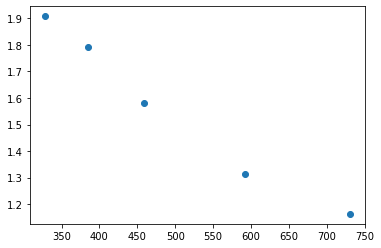

In [ ]:
plt.scatter(widths, depths)

reg1 = stats.linregress(widths,depths)
reg2 = stats.linregress(widths,1/depths)
reg3 = stats.linregress(widths, 1/(depths**2))
print(reg1)
print(reg2)
print(reg3)

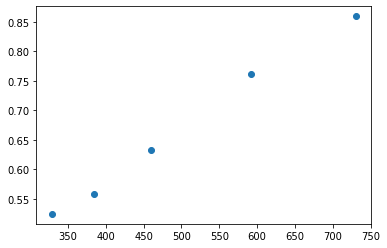

In [ ]:
new_d = 1 / depths
plt.scatter(widths, 1/depths)

-1.4910118920153326 -1.6395398023421466 -1.3132102979223492 -1.2427324213630289 -1.3986914644825001
-1.4170371756250715


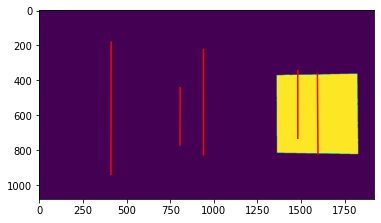

In [ ]:
e1 = load_and_estimate_width2(reg1.slope, 5)
e2 = load_and_estimate_width2(reg1.slope, 55)
e3 = load_and_estimate_width2(reg1.slope, 175)
e4 = load_and_estimate_width2(reg1.slope, 105)
e5 = load_and_estimate_width2(reg1.slope, 245)

print(e1,e2,e3,e4,e5)
e_mean = np.mean((e1,e2,e3,e4,e5))
print(e_mean)

0.42220515658287466 0.6787969095333435 0.14906873971548784 0.10039534504652116 0.22236972514258802
0.314567175204163


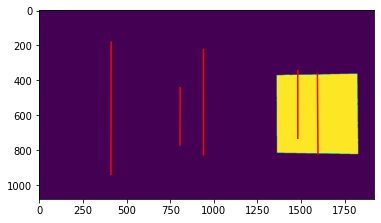

In [ ]:
e1 = load_and_estimate_width3(reg3.slope, 5)
e2 = load_and_estimate_width3(reg3.slope, 55)
e3 = load_and_estimate_width3(reg3.slope, 175)
e4 = load_and_estimate_width3(reg3.slope, 105)
e5 = load_and_estimate_width3(reg3.slope, 245)

print(e1,e2,e3,e4,e5)
e_mean = np.mean((e1,e2,e3,e4,e5))
print(e_mean)

0.00012936204492959233


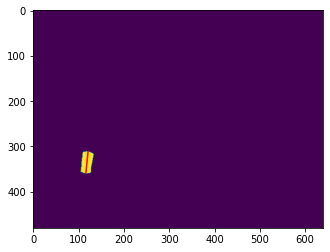

In [ ]:
k = load_and_find_k_of_tree(.007, 1, 1)
print(k)

In [ ]:
e = load_and_estimate_widthT(k, 5)

IndexError: ignored

24.485965408535833


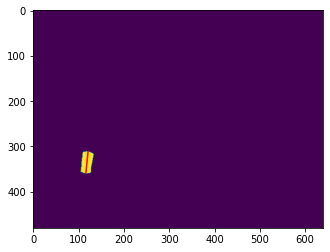

In [ ]:
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy')
width,labeled_trees = calc_widthT(im, 1)
print(width)


In [ ]:
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth1.npy')

depth = calc_depthT(labeled_trees, ground_truth)
print(depth)

0.4606255


-1044279.5176832107
24.36577318861754 23.97621671551377


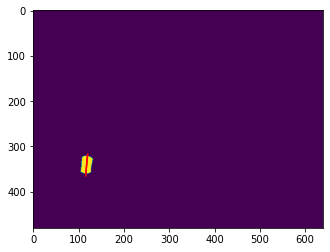

In [ ]:
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
labeled_trees[labeled_trees != 1] = 0
width1 = trunk_width(labeled_trees)
width2 = trunk_width_imp(labeled_trees)
print(width1, width2)

[0.002572183887195754, 0.002353308511139458, 0.002896940379031985, 0.003188726825668824, 0.002756462932687768]
0.002753524507144758


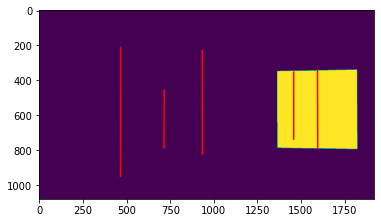

In [ ]:
k1 = load_and_find_k_of_block2(2, 1)
k2 = load_and_find_k_of_block2(2, 50)
k3 = load_and_find_k_of_block2(2, 170)
k4 = load_and_find_k_of_block2(2, 100)
k5 = load_and_find_k_of_block2(2, 240)
ks = [k1,k2,k3,k4,k5]
print(ks)

k_mean = np.mean(ks)
print(k_mean)

0.9877425610069398


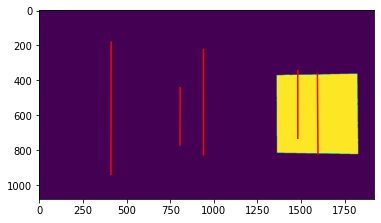

In [ ]:
e1 = load_and_estimate_width(k_mean, 5)
e2 = load_and_estimate_width(k_mean, 55)
e3 = load_and_estimate_width(k_mean, 175)
e4 = load_and_estimate_width(k_mean, 105)
e5 = load_and_estimate_width(k_mean, 245)

e_mean = np.mean((e1,e2,e3,e4,e5))
print(e_mean)

[0.0044413747067218205, 0.003185063948070907, 0.009313503105284919, 0.011607629921284165, 0.006880900090035355]
0.007085694354279433


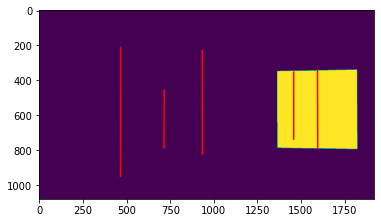

In [ ]:
k1 = load_and_find_k_of_block(2, 1)
k2 = load_and_find_k_of_block(2, 50)
k3 = load_and_find_k_of_block(2, 170)
k4 = load_and_find_k_of_block(2, 100)
k5 = load_and_find_k_of_block(2, 240)
ks = [k1,k2,k3,k4,k5]
print(ks)

k_mean = np.mean(ks)
print(k_mean)

2.541775774956064


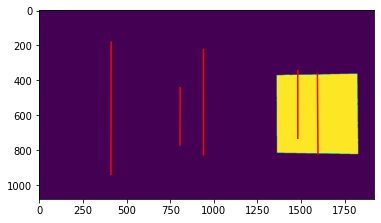

In [ ]:
e1 = load_and_estimate_width(k_mean, 5)
e2 = load_and_estimate_width(k_mean, 55)
e3 = load_and_estimate_width(k_mean, 175)
e4 = load_and_estimate_width(k_mean, 105)
e5 = load_and_estimate_width(k_mean, 245)

e_mean = np.mean((e1,e2,e3,e4,e5))
print(e_mean)

0.0005707814722084489


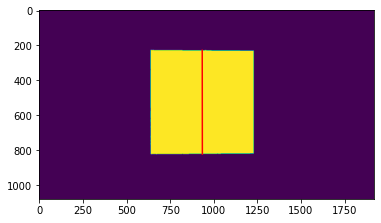

In [ ]:

im = np.load("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame1.npy")[:,:,0]
depth_im = np.load('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image1.npy')

k = calculate_k_blocks(2, im, depth_im)
print(k)

-326851860.0351695
591.7254948155177
1 0


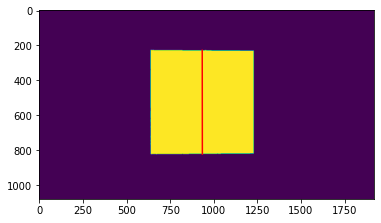

In [ ]:
im = np.load("/content/drive/MyDrive/Lidar Trees/Block Depth/Frames From MP4/frame1.npy")[:,:,0]

im[im < 10] = 0
im[im != 0] = 1

measured_width = trunk_width_imp(im)
print(measured_width)
plt.imshow(im)
print(im.max(), im.min())

In [ ]:
X, Y = np.mgrid[0:mask.shape[0],0:mask.shape[1]]

Z = Y[im >= 100]
Y.shape, X.shape, mask.shape, Z.shape
width = Z.max() - Z.min()
print(width)
error = error_calc(width, measured_width)
print(error)

589
-0.004627325663018105


1 0 0.16887297453703703 uint8
0.16887297453703703


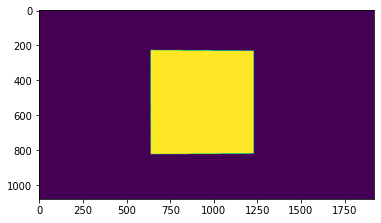

In [ ]:
depth_im = np.load('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG_from_EXR/Image1.npy')
print(im.max(), im.min(), im.mean(), im.dtype)

depth_im[im != 1] = np.nan
plt.imshow(im)
depth = np.nanmean(im)
print(depth)
# plt.imshow(im)

In [ ]:
im.shape
im0 = depth_im[:,:,0]
depth = im0[im >= 100].mean()
plt.imshow(im0)
print(depth)
k = (depth/width) * 2
print(k)

NameError: ignored

(1080, 1920, 4)
0
1


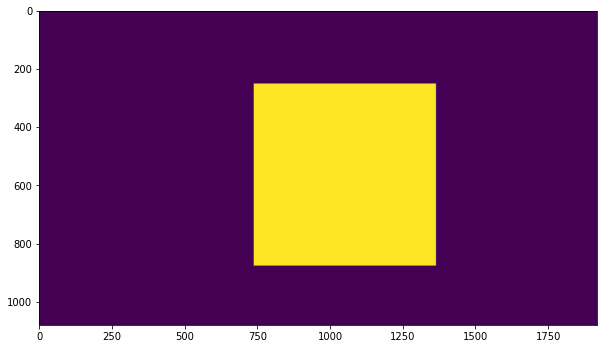

In [ ]:
# CUBE IS 2 METERS LONG

im = io.imread('/content/drive/MyDrive/Lidar Trees/Block Images/0001.png')
print(im.shape)
fig = plt.figure(figsize=(10,10))
im = im[:,:,0]
im[im <= 100] = 0
im[im != 0] = 1
plt.imshow(im)
print(im[0,0])
print(im[600,1000])

uint8
(1080, 1920)
255.0


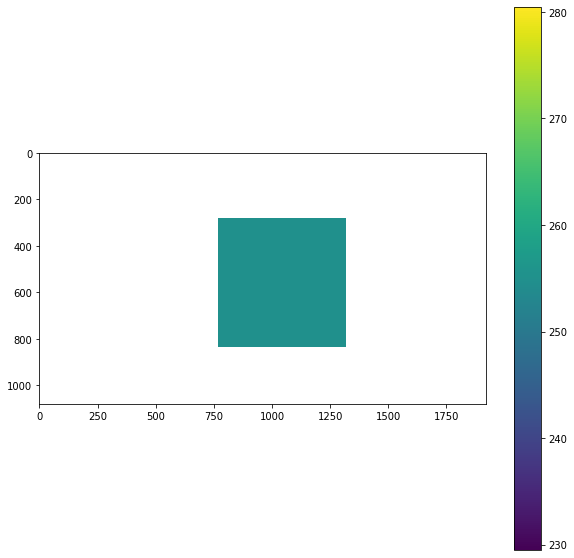

In [ ]:
fig = plt.figure(figsize=(10,10))
# init = io.imread('/content/drive/MyDrive/Lidar Trees/Block Depth/PNG/Image0001.png')
init_im_depth = np.load('/content/drive/MyDrive/Lidar Trees/Block Depth/NPY/Image5.npy')
print(init_im_depth.dtype)
# plt.imshow(init_im_depth)
im_depth = init_im_depth[:,:,0]

print(im_depth.shape)
im_depth = im_depth.astype(float)
im_depth[im_depth == 0] = np.nan
# im_depth[im_depth == 0] = np.nan
depth = np.nanmean(im_depth)

print(depth)


plt.imshow(im_depth)
plt.colorbar()

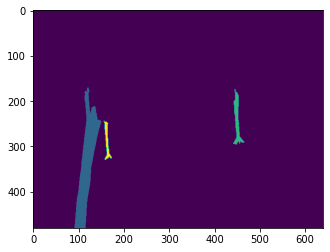

In [ ]:
# SEGMENT GT TRUNK IMAGE
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
# label_trunks(im)
# trunk_labels = measure.label(im)
plt.imshow(labeled_trees)
# print(num)

-1044279.5176832107
24.36577318861754


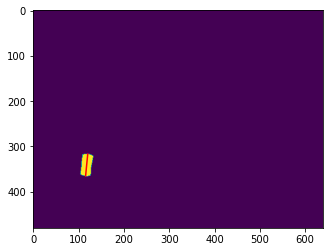

In [ ]:
labeled_trees[labeled_trees != 1] = 0

diam = trunk_width(labeled_trees)
print(diam)

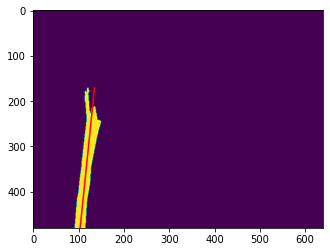

In [ ]:
# NEW WITHOUT SHRUNK TRUNK
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)

labeled_trees[labeled_trees != 1] = 0

# CIRCLE DISTANCES
# row, col = ndimage.measurements.center_of_mass(labeled_trees)
# row = math.floor(row)
# col = math.floor(col)


xs, ys, reg = im_to_line_d(labeled_trees)

slope = reg.slope

n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
dot_dist = np.dot(n, (ys,xs))



8.050849176065
-1044279.5176832107


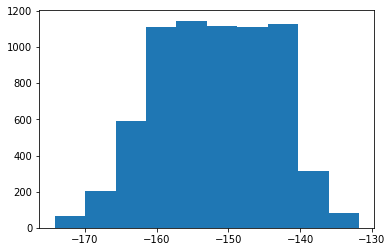

In [ ]:
plt.hist(dot_dist.flatten())
dist_std = np.std(dot_dist)
print(dist_std)
print(dot_dist.sum())

-150.02365684515385
24.36577318861754


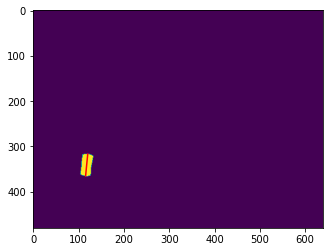

In [ ]:
# CIRCLE DISTANCES ROUND TWO
# fig = plt.figure(figsize=(30,30))
row, col = ndimage.measurements.center_of_mass(labeled_trees)
row = math.floor(row)
col = math.floor(col)
dist_mask = np.sqrt((x_mesh - col)**2 + (y_mesh - row)**2) > dist_std * 3
labeled_trees[dist_mask == 1] = 0

xs, ys, reg = im_to_line_d(labeled_trees)

slope = reg.slope
n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])

offset = np.dot(n,(row, col))
print(offset)
dot_dist = np.dot(n, (ys,xs)) - offset

trunk_diam = (np.max(dot_dist) - np.min(dot_dist))
print(trunk_diam)

0.46431622


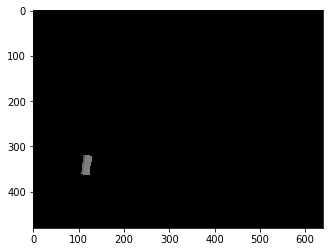

In [ ]:
# plt.imshow(labeled_trees)
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth1.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 1] = np.nan
plt.imshow(ground_truth)
depth = np.nanmean(ground_truth)
print(depth)
# FOCAL LENGTH 50mm
# Measured Length = .115m
k = .115 / (depth * trunk_diam)
# print(k)

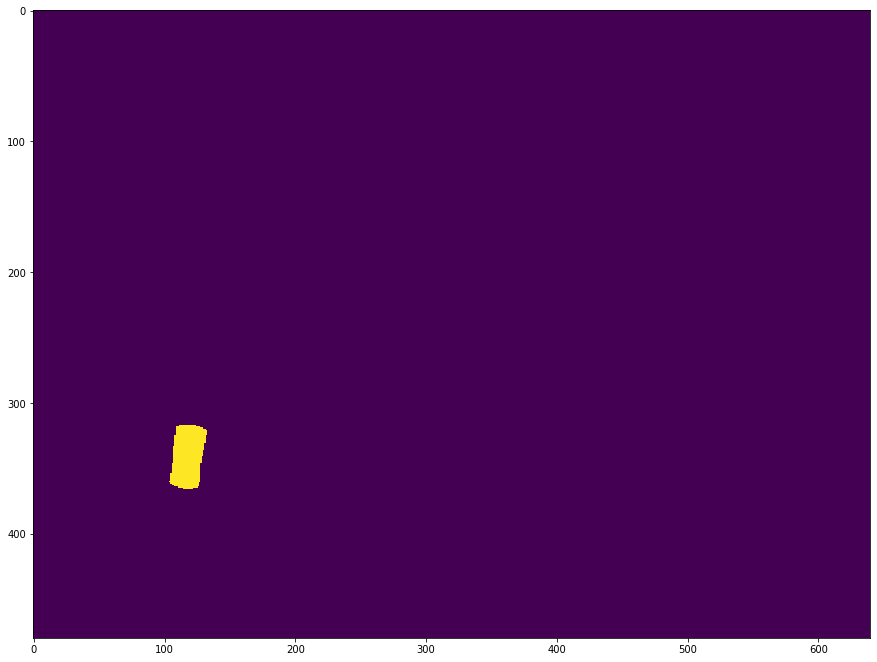

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(labeled_trees, interpolation="nearest")
# cv2.imwrite("/content/drive/MyDrive/Lidar Trees/trunk_count.jpg", labeled_trees) 
# plt.savefig('/content/drive/MyDrive/Lidar Trees/trunk_count.png', dpi=fig.dpi)

-4863665.799443629
24.2754068002057


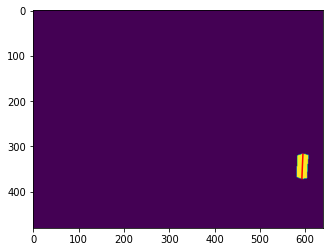

In [ ]:
# SEGMENT GT TRUNK IMAGE Part 2
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame340.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
# trunk_labels = measure.label(im)
plt.imshow(labeled_trees)
# print(num)

labeled_trees[labeled_trees != 2] = 0
# True_width = constant*width_pixels*depth
diam2 = trunk_width(labeled_trees)
print(diam2)

0.010643263612773485


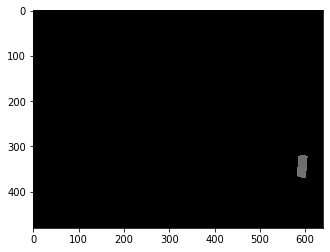

In [ ]:
# real world estimate
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth340.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 2] = np.nan
plt.imshow(ground_truth)
depth2 = np.nanmean(ground_truth)

# est2 = k*depth*diam
k2 = .115 / (depth2 * trunk_diam)
print(k2)

In [ ]:
b = (diam2 * depth2) / (.05)
b

215.2976732222323

-768251.8078323021
17.850961351889225


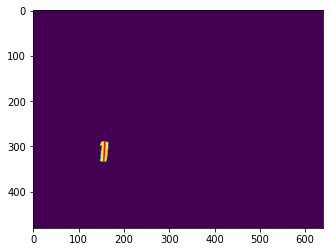

In [ ]:
# SEGMENT GT TRUNK IMAGE Part 3
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame340.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
# trunk_labels = measure.label(im)
plt.imshow(labeled_trees)
# print(num)

labeled_trees[labeled_trees != 3] = 0

diam3 = trunk_width(labeled_trees)
print(diam3)

0.01055191084872775


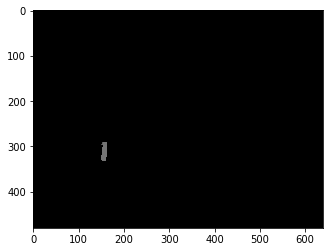

In [ ]:
# real world estimate
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth340.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 3] = np.nan
plt.imshow(ground_truth)
depth3 = np.nanmean(ground_truth)

# est2 = k*depth*diam
k3 = .115 / (depth3 * trunk_diam)
print(k3)

AVERAGE K:  0.01045336344586662
SLOPE OR K:  119.10526548839749
1 / Slope:  0.008395934435807238


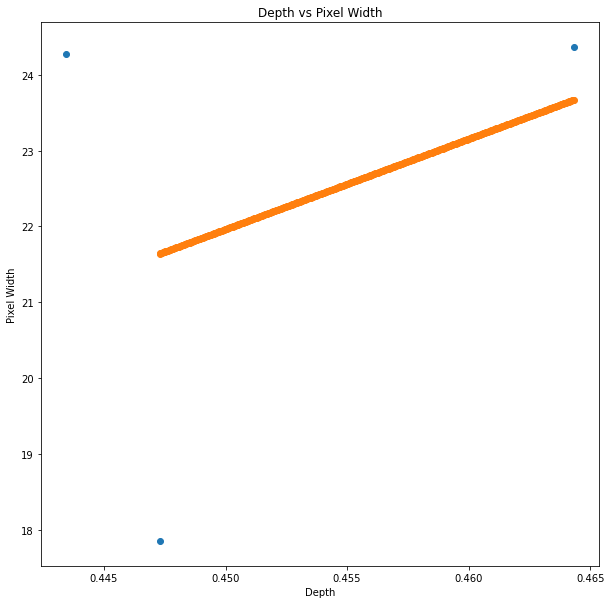

In [ ]:
# AVERAGE OUT K FOR 3 TREES
k_avg = (k + k2 + k3) / 3
print("AVERAGE K: ", k_avg)

fig = plt.figure(figsize=(10,10))

ks = (k, k2, k3)
diams = (trunk_diam, diam2, diam3)
depths = (depth, depth2, depth3)

plt.scatter(depths, diams)
plt.title("Depth vs Pixel Width")
plt.xlabel("Depth")
plt.ylabel("Pixel Width")

reg = stats.linregress(depths, diams)
xs = np.linspace(depth, depth3, 500)
ys = xs*reg.slope + reg.intercept
plt.scatter(xs, ys)
print("SLOPE OR K: ", reg.slope)
print("1 / Slope: ", 1/reg.slope)
new_k = 1 / reg.slope

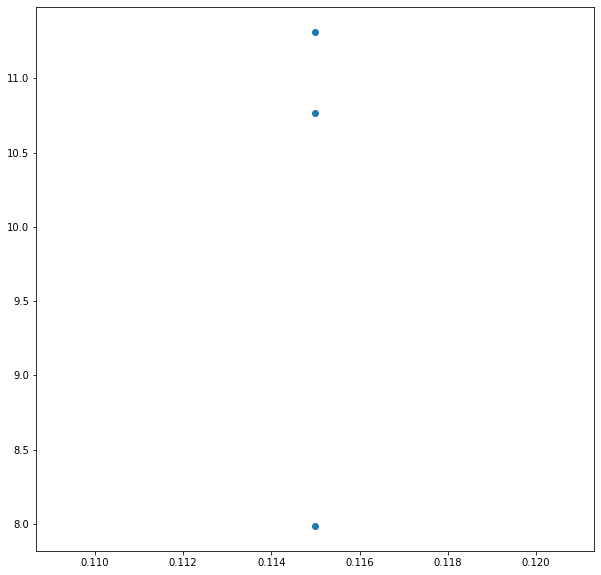

In [ ]:
fig = plt.figure(figsize=(10,10))
ad = [(trunk_diam*depth), (diam2*depth2), (diam3*depth3)]

plt.scatter(ad, [.115,.115,.115])

-6820119.674421013
30.433822232781154


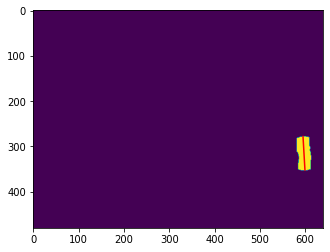

In [ ]:
# SEGMENT GT TRUNK IMAGE Part 4
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame40.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
# trunk_labels = measure.label(im)
plt.imshow(labeled_trees)
# print(num)

labeled_trees[labeled_trees != 2] = 0

diam = trunk_width(labeled_trees)
print(diam)

Estimate: 0.11182082293774798 Error: 2.764501793262633


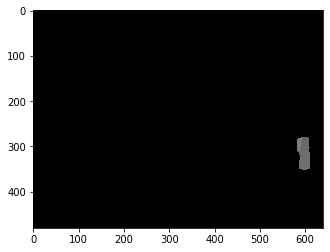

In [ ]:
# real world estimate
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth340.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 2] = np.nan
plt.imshow(ground_truth)
depth = np.nanmean(ground_truth)

est = new_k*depth*diam
print("Estimate:", est, "Error:", ((.115 - est) / .115) * 100)

-1208557.1855406705
12.299381421900534


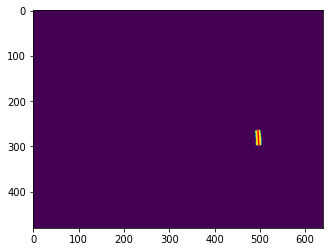

In [ ]:
# SEGMENT GT TRUNK IMAGE Part 5
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame20.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks
plt.imshow(im)

labeled_trees, num = ndi.label(im)

plt.imshow(labeled_trees)


labeled_trees[labeled_trees != 1] = 0

diam = trunk_width(labeled_trees)
print(diam)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.04484746287617054

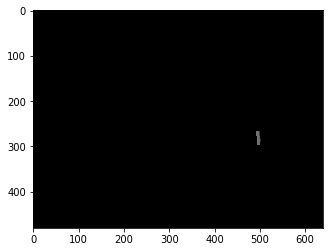

In [ ]:
# real world estimate
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth20.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 1] = np.nan
plt.imshow(ground_truth)
depth = np.nanmean(ground_truth)

est = k_avg*depth*diam
est

-449700.15040080936
7.59181995459312


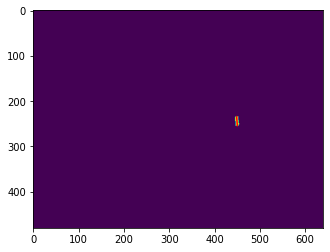

In [ ]:
# SEGMENT GT TRUNK IMAGE
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame1.npy')
morphology.remove_small_objects(im, 400, 1, True) # 200 leaves all trunks and extra, 400 removes small trunks

labeled_trees, num = ndi.label(im)
# trunk_labels = measure.label(im)
plt.imshow(labeled_trees)
# print(num)

labeled_trees[labeled_trees != 2] = 0

diam = trunk_width(labeled_trees)
print(diam)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.00284992137276663


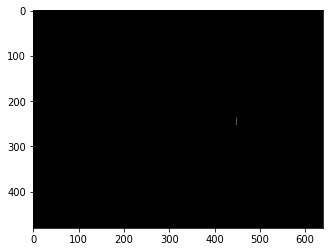

In [ ]:
# real world estimate
ground_truth = np.load('/content/drive/MyDrive/Lidar Trees/Depth Pass/PNG/ground_truth1.npy')
# plt.imshow(ground_truth)
ground_truth[labeled_trees != 2] = np.nan
plt.imshow(ground_truth)
depth = np.nanmean(ground_truth)

est2 = k*depth*diam
print(est2)

-92837.77312700821


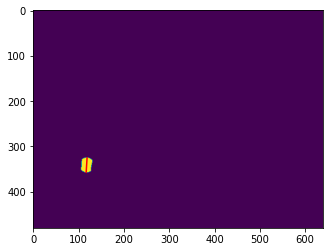

In [ ]:
# CIRCLE DISTANCES ROUND TWO
row, col = ndimage.measurements.center_of_mass(labeled_trees)
row = math.floor(row)
col = math.floor(col)
dist_mask = np.sqrt((x_mesh - col)**2 + (y_mesh - row)**2) > dist_std * 2
labeled_trees[dist_mask == 1] = 0

xs, ys, reg = im_to_line_d(labeled_trees)

slope = reg.slope
n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
dot_dist = np.dot(n, (ys,xs))
print(dot_dist.sum())

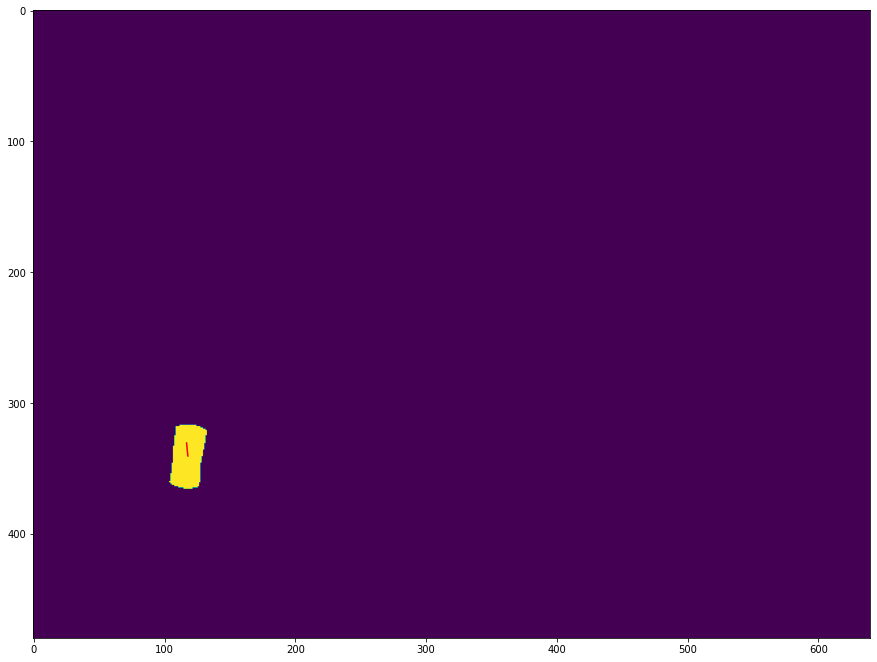

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(labeled_trees)

slope = reg.slope
n = np.array([slope / (np.sqrt(1 + slope ** 2)) , (-1 / np.sqrt(1 + slope **2))])
rot_n = np.array([-n[1], n[0]])
row, col = ndimage.measurements.center_of_mass(labeled_trees)

plt.plot([col, 10*n[0] + col], [row, 10*n[1] + row], '-r')

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
# print(labeled_trees)

(12691,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


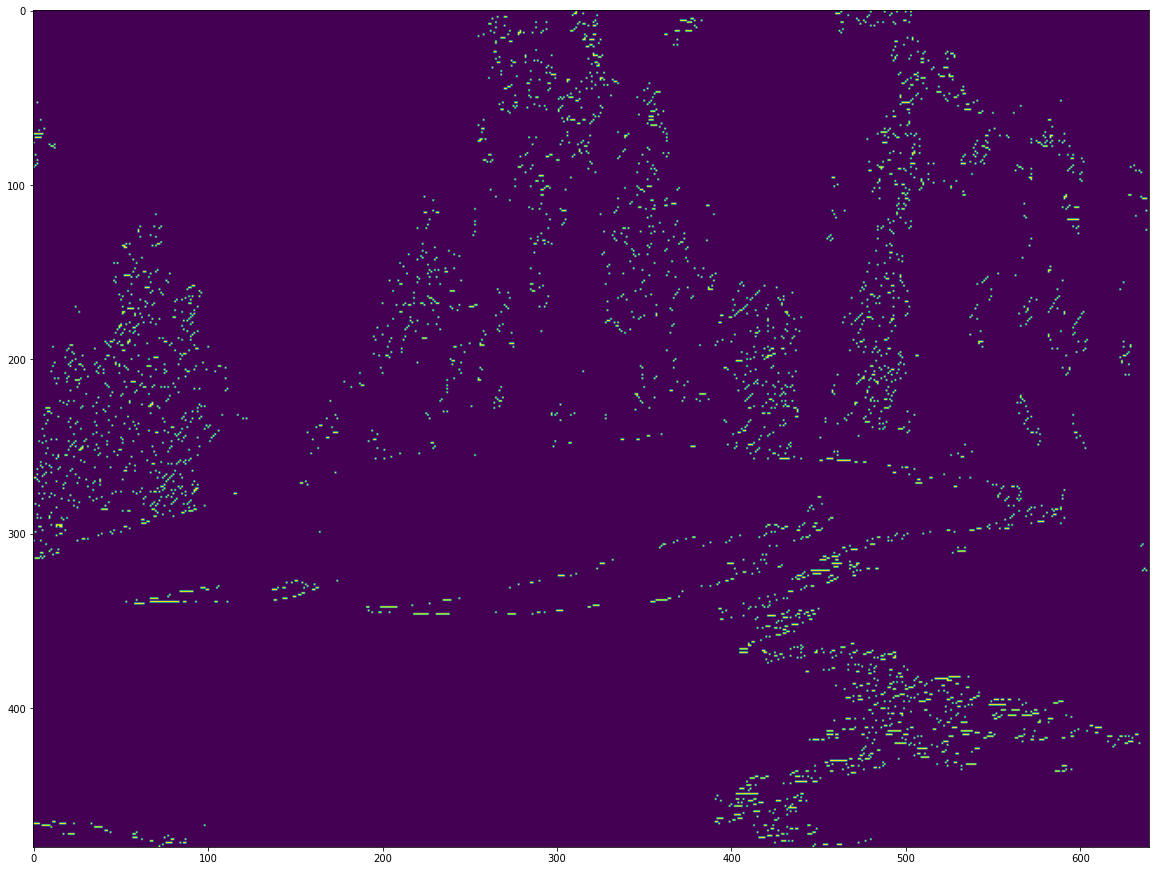

In [ ]:
print(np.shape(all_lines))
im = np.zeros((480,640))
for i in range(0, len(all_lines)):
  if (gt_trunk_classifications[i] == 0):
    continue
  for j in range(0, len(all_lines[i])):
    
    x = all_lines[i][j][1]
    y = all_lines[i][j][0] - 640
    im[x][y] = 255

fig = plt.figure(figsize=(20,20))
plt.imshow(im)

In [ ]:
# MIDPOINT CALCULATION
mids_x = (hough_lines[:,0,0] + hough_lines[:,0,2]) / 2
mids_y = (hough_lines[:,0,1] + hough_lines[:,0,3]) / 2

# DISTANCE CALCULATION
distances = np.sqrt( ((hough_lines[:,0,3] - hough_lines[:,0,1])**2) + ((hough_lines[:,0,2] - hough_lines[:,0,0])**2))

# UNIT VECTOR CALCULATION
x_units = (hough_lines[:,0,2] - hough_lines[:,0,0]) / distances 
y_units = (hough_lines[:,0,3] - hough_lines[:,0,1]) / distances 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# 3x3 PIXEL VALUE CALCULATION
pixels = []
src = cv.imread('/content/drive/MyDrive/Colab Notebooks/DenseDepth/examples/frame0.png') # SWITCH TO GRAYSCALE AND REFACTOR
for i in range(0, len(hough_lines)):
  x = math.floor(mids_x[i])
  y = math.floor(mids_y[i])
  sq = src[x-1:x+2, y-1:y+2, 0]
  sq_flat = sq.flatten()
  pixels.append(sq_flat)

In [ ]:
# X = [x_midpoint, y_midpoint, x_unit, y_unit, distance, top-left-pixel, top-mid-pixel, top-right-pixel, mid-left-pixel, mid-mid-pixel, mid-right-pixel, bottom-left-pixel, bottom-mid-pixel, bottom-right-pixel]
# LENGTH OF 14 ATTRIBUTES

X = []
for i in range(0, len(hough_lines)):
  if (len(pixels[i]) == 9):
    tmp = [mids_x[i], mids_y[i], x_units[i], y_units[i], distances[i], pixels[i][0], pixels[i][1], pixels[i][2], pixels[i][3], pixels[i][4], pixels[i][5], pixels[i][6], pixels[i][7], pixels[i][8]]
    X.append(tmp)

# for i in range(0, len(X)):
#   print(X[i][0], X[i][1], X[i][2], X[i][3], X[i][4], X[i][5], X[i][6], X[i][7], X[i][8], X[i][9], X[i][10], X[i][11], X[i][12])

# print(np.shape(X))


(1364,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


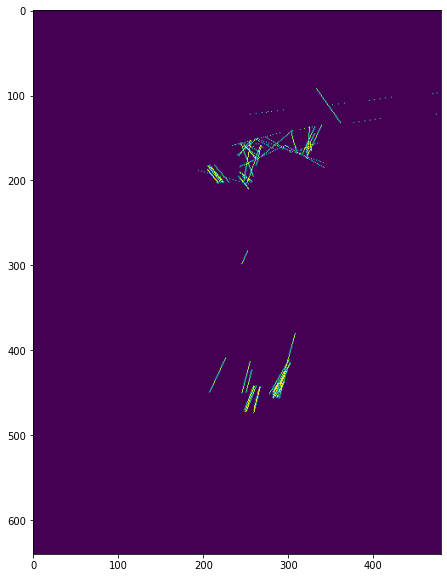

In [ ]:
# LINES NEED TO BE FLIPPED AND ROTATED (CAN FLIP AND ROTATE ORIGINAL IMAGE FOR COMPARISON)
# DISPLAY LINES VIA PIXELS
im = np.zeros((640,480))
print(np.shape(all_lines))
for i in range(0, len(all_lines)):
  if (gt_trunk_classifications[i] == 0):
    continue
  for j in range(0, len(all_lines[i])):
    x = all_lines[i][j][0]
    y = all_lines[i][j][1]
    im[x][y] = 255
# im = np.fliplr(np.rot90(im, 3))
fig = plt.figure(figsize=(10,10))
plt.imshow(im)



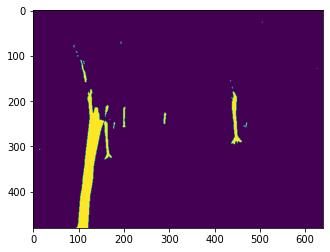

In [ ]:
im = np.load('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame0.npy')
plt.imshow(im)


In [ ]:
# CREATE TRUNK GROUND TRUTH IMAGES
for i in range(0,350):
  im = io.imread('/content/drive/MyDrive/Lidar Trees/Color Trunks/PNG FRAMES/frame{}.png'.format(i))
  im_2 = im.mean(axis = 2)

  hue = im.reshape((480*640,3)) / im_2.reshape((480*640,1))
  hue = hue.reshape(480, 640, 3)

  thresh = 2.5
  trunk_diff = (hue[:,:,0] - hue[:,:,2]) > thresh
  new_trunk_diff = median(trunk_diff)
  np.save('/content/drive/MyDrive/Lidar Trees/Color Trunks/Trunk Ground Truth/frame{}'.format(i), new_trunk_diff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


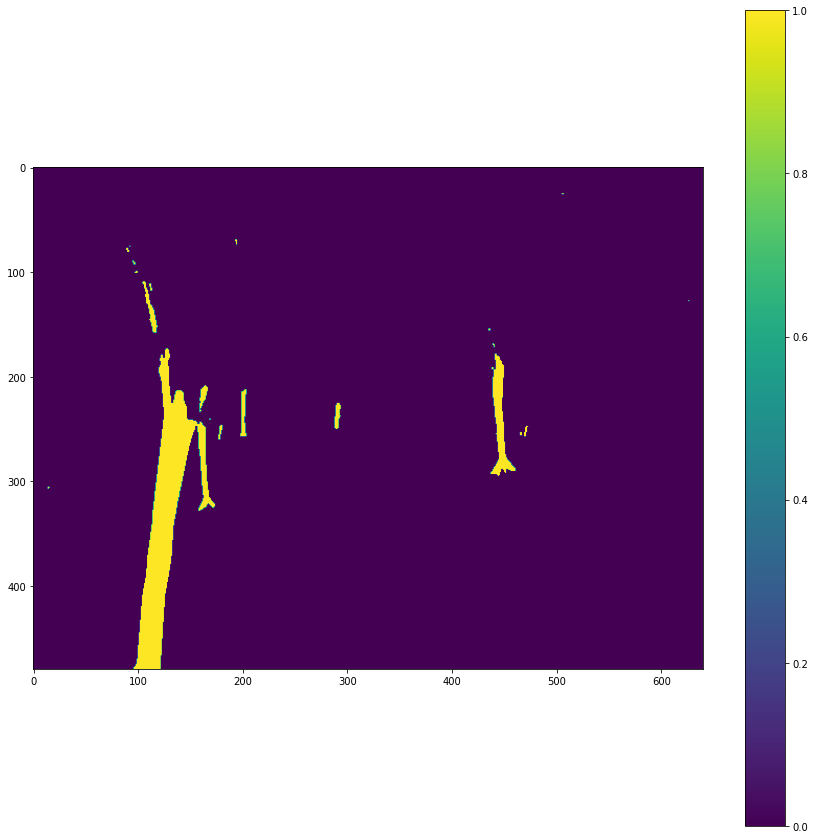

In [ ]:
im = io.imread('/content/drive/MyDrive/Lidar Trees/Color Trunks/PNG FRAMES/frame0.png')
im_2 = im.mean(axis = 2)

# REMOVE 0 BLACK
im_2[im_2==10]=1
# plt.imshow(im_2)


hue = im.reshape((480*640,3)) / im_2.reshape((480*640,1))

hue = hue.reshape(480, 640, 3)
# plt.imshow(hue)

thresh = 2.5
trunk_diff = (hue[:,:,0] - hue[:,:,2]) > thresh
# fig = plt.figure(figsize=(15,15))
# plt.imshow(trunk_diff)
# print(trunk_diff.shape)
# plt.colorbar()

fig = plt.figure(figsize=(15,15))
new_trunk_diff = median(trunk_diff)
plt.imshow(new_trunk_diff)
plt.colorbar()


In [ ]:
print(new_trunk_diff.shape)
print(np.count_nonzero(new_trunk_diff == 1))

(480, 640)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
8760


307200

## TensorFlow Messings

In [ ]:
x_train
x_test

y_train
y_test

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 2
input_shape = (28, 28, 1)

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="binary_classification"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 43s 99ms/step - loss: 0.3639 - accuracy: 0.8880 - val_loss: 0.0843 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 42s 99ms/step - loss: 0.1145 - accuracy: 0.9648 - val_loss: 0.0568 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0862 - accuracy: 0.9732 - val_loss: 0.0485 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0717 - accuracy: 0.9777 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.0332 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026377666741609573
Test accuracy: 0.9909999966621399
